### Analysis of NHS utilisation of services and missed appointments

#### The two main questions posed by the NHS are:

1. Has there been adequate staff and capacity in the networks?
2. What was the actual utilisation of resources?

Prepared by Lilliana Golob

# Import data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Import files

ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
tweets = pd.read_csv('tweets.csv')

# Check files uploaded (number of rows and columns)

print(f"ad: {ad.shape}")
print(f"ar: {ar.shape}")
print(f"nc: {nc.shape}")
print(f"tweets: {tweets.shape}")

ad: (137793, 8)
ar: (596821, 7)
nc: (817394, 8)
tweets: (1174, 10)


# Functions

In [2]:
# Function to review and validate the data

def review_data(df):
    """
    Review the data in a dataframe returning datatypes,
    missing values, descriptive statistics, 
    duplicates and unique values.
    """
    
    print("COLUMN NAMES AND DATA TYPES")
    info_df = df.info()
    print("")
       
    print("MISSING VALUES")
    missing_df = df.isnull().sum()
    print(missing_df)
    print("")
    
    print("DESCRIPTIVE STATS")
    desc_stats = df.describe()
    print(desc_stats)
    print("")
    
    print("COUNT OF DUPLICATES")
    dup_count = df.duplicated().sum
    print(dup_count)
    print("")
    
    print("COUNT UNIQUE")
    unique_count = df.nunique()
    print(unique_count)
    print("")
    
    return info_df, missing_df, desc_stats, dup_count, unique_count

In [3]:
# Function to calculate IQR and outliers

def calculate_IQR(df):
    """
    Calculates IQR and number of outliers with a threshold of 1.5,
    for 'count_of_appointments' column in specified dataframe df,
    and prints the IQR and len of outliers.
    """
    
    Q1 = Q1 = df['count_of_appointments'].quantile(0.25)
    Q3 = df['count_of_appointments'].quantile(0.75)
    IQR = Q3 - Q1
    
    # identify outliers
    threshold = 1.5
    outliers = df[(df['count_of_appointments'] < Q1 - threshold * IQR) | (df['count_of_appointments'] > Q3 + threshold * IQR)]
    
    return print(f"IQR: {(IQR)}"), print(f"Number of outliers: {len(outliers)}")

In [4]:
# Function to find number of reords for specific location and date range

def records_per_location():
    """
    Counts the number of records by 'service_setting',
    for a specific'sub_icb_location_name' (location_name),
    which can be a partial description and ignores case sensitivity,
    for a date range specified by the user (start) (end) that must be entered as yyyy-mm-dd,
    a new smaller dataframe (sr) is created based on nc dataframe,
    the result is held in a new filtered dataframe (srf),
    and displays the number (count) of records for each 'service_setting' grouped by 'sub_icb_loation_name'.
    """
    
    location = input("Enter the location: ")
    start = input("Enter the start date as yyyy-mm-dd (eg 2021-12-31): ")
    end = input("Enter the end date as yyyy-mm-dd (eg 2021-12-31): ")
    
    sr = nc[['service_setting', 'appointment_date', 'count_of_appointments', 'sub_icb_location_name']].copy()
    
    srf = sr[(sr['appointment_date'] >= start) & 
             (sr['appointment_date'] <= end) & 
             (sr['sub_icb_location_name'].str.contains(location))]
     
    return print(f"\n"
                 f"Number of records between {start} and {end} by: \n"
                 f"{srf.groupby(['sub_icb_location_name', 'service_setting'])['count_of_appointments'].count()}")

In [5]:
# Function to find number of appointments for a location and date range

def appointments_per_location():
    """
    Counts the number of appointments available by 'service_setting',
    by a 'sub_icb_location_name' specified by the user (location),
    which can be a partial description and ignores case sensitivity,
    for a date range specified by the user (start) (end) that must be entered as yyyy-mm-dd,
    a new smaller dataframe (sr) is created based on nc dataframe,
    the result is held in a new filtered dataframe (srf),
    and displays the sum of 'count_of_appointments' for each 'service_setting' grouped by 'sub_icb_loation_name'.
    """
    
    location = input("Enter the location: ")
    start = input("Enter the start date as yyyy-mm-dd (eg 2021-12-31): ")
    end = input("Enter the end date as yyyy-mm-dd (eg 2021-12-31): ")
    
    sr = nc[['service_setting', 'appointment_date', 'count_of_appointments', 'sub_icb_location_name']].copy()
    
    srf = sr[(sr['appointment_date'] >= start) & 
             (sr['appointment_date'] <= end) & 
             (sr['sub_icb_location_name'].str.contains(location))]
     
    return print(f"\n"
                 f"Total appointments available between {start} and {end} by: \n"
                 f"{srf.groupby(['sub_icb_location_name', 'service_setting'])['count_of_appointments'].sum()}")


In [6]:
# Function to set up a plot

def set_up_plot():
    """
    Sets the plot figure size to 15, 12 
    and the style to white
    """
    
    plt.figure(figsize = (15, 12))
    sns.set_style('white')
    
    return print("The plot is set up; start making your visualisation.")

In [7]:
# Function to create lineplot

def create_lineplot(plot_name, data_var, x_var, y_var, 
                    hue_var, style_var, 
                    plot_title, x_label, y_label, file_name):
    """
    Creates a lineplot grouped by hue and/or line style,
    using colorblind palette,
    displays the lineplot,
    and saves image as png at 300 dpi.
    """
    
    plot_name = sns.lineplot(x = x_var, 
             y = y_var,
             data = data_var,
             hue = hue_var,
             style = style_var,
             palette = 'colorblind',
             linewidth = 3,
             errorbar = None)
    
    # Customise titles
    plt.title(plot_title, size = 20)
    plt.xlabel(x_label, size = 16)
    plt.ylabel(y_label, size = 16)
    plt.legend(title = '', fontsize = '16')
        
    # Make sure numbers are in full, rather than scientific notation
    plt.ticklabel_format(style ='plain', axis ='y')
    
    # Move legend outside of plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
       
    return plot_name, plt.savefig(file_name, dpi = 300)

In [8]:
# Function to create barplot

def create_barplot(plot_name, data_var, 
                   x_var, y_var,
                   order_var,
                   plot_title, x_label, y_label, file_name):
    
    """
    Creates a barplot using colorblind palette,
    with custom title, x and y labels,
    with custom order of the bars as a list,
    displays the barchart and saves image as png at 300 dpi.
    """
    
    plot_name = sns.barplot(x = x_var,
                            y = y_var,
                            data = data_var,
                            palette = 'colorblind',
                            errorbar = None,
                            order = order_var)
    
    # Customise titles
    plt.title(plot_title, size = 20)
    plt.xlabel(x_label, size = 16)
    plt.ylabel(y_label, size = 16)
    plt.legend(title = '', fontsize = '16')
        
    # Make sure numbers are in full, rather than scientific notation
    plt.ticklabel_format(style ='plain', axis ='y')
    
    # Move legend outside of plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
       
    return plot_name, plt.savefig(file_name, dpi = 300)

# Data validation

In [9]:
# Use function to validate dataframes

review_data(ad)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB

MISSING VALUES
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointmen

(None,
 sub_icb_location_code        0
 sub_icb_location_ons_code    0
 sub_icb_location_name        0
 icb_ons_code                 0
 region_ons_code              0
 appointment_date             0
 actual_duration              0
 count_of_appointments        0
 dtype: int64,
        count_of_appointments
 count          137793.000000
 mean             1219.080011
 std              1546.902956
 min                 1.000000
 25%               194.000000
 50%               696.000000
 75%              1621.000000
 max             15400.000000,
 <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 137788    False
 137789    False
 137790    False
 137791    False
 137792    False
 Length: 137793, dtype: bool>,
 sub_icb_location_code         106
 sub_icb_location_ons_code     106
 sub_icb_location_name         106
 icb_ons_code                   42
 region_ons_code               

In [10]:
review_data(ar)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB

MISSING VALUES
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_ap

(None,
 icb_ons_code                         0
 appointment_month                    0
 appointment_status                   0
 hcp_type                             0
 appointment_mode                     0
 time_between_book_and_appointment    0
 count_of_appointments                0
 dtype: int64,
        count_of_appointments
 count          596821.000000
 mean             1244.601857
 std              5856.887042
 min                 1.000000
 25%                 7.000000
 50%                47.000000
 75%               308.000000
 max            211265.000000,
 <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 596816    False
 596817     True
 596818    False
 596819    False
 596820     True
 Length: 596821, dtype: bool>,
 icb_ons_code                            42
 appointment_month                       30
 appointment_status                       3
 hcp_type      

In [11]:
review_data(nc)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB

MISSING VALUES
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appoi

(None,
 appointment_date         0
 icb_ons_code             0
 sub_icb_location_name    0
 service_setting          0
 context_type             0
 national_category        0
 count_of_appointments    0
 appointment_month        0
 dtype: int64,
                     appointment_date  count_of_appointments
 count                         817394          817394.000000
 mean   2022-01-16 00:50:35.860796160             362.183684
 min              2021-08-01 00:00:00               1.000000
 25%              2021-10-25 00:00:00               7.000000
 50%              2022-01-18 00:00:00              25.000000
 75%              2022-04-07 00:00:00             128.000000
 max              2022-06-30 00:00:00           16590.000000
 std                              NaN            1084.576600,
 <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 817389    False
 817390    False
 81739

In [12]:
review_data(tweets)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB

MISSING VALUES
tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               

(None,
 tweet_id                     0
 tweet_full_text              0
 tweet_entities               0
 tweet_entities_hashtags    167
 tweet_metadata               0
 tweet_retweet_count          0
 tweet_favorite_count         0
 tweet_favorited              0
 tweet_retweeted              0
 tweet_lang                   0
 dtype: int64,
            tweet_id  tweet_retweet_count  tweet_favorite_count
 count  1.174000e+03          1174.000000            1174.00000
 mean   1.567612e+18             8.629472               0.37138
 std    2.427553e+13            29.784675               2.04470
 min    1.567574e+18             0.000000               0.00000
 25%    1.567590e+18             0.000000               0.00000
 50%    1.567611e+18             1.000000               0.00000
 75%    1.567633e+18             3.000000               0.00000
 max    1.567655e+18           303.000000              42.00000,
 <bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
 1  

In [13]:
# Use function to look for outliers

calculate_IQR(ad)

IQR: 1427.0
Number of outliers: 9291


(None, None)

In [14]:
calculate_IQR(ar)

IQR: 301.0
Number of outliers: 97348


(None, None)

In [15]:
calculate_IQR(nc)

IQR: 121.0
Number of outliers: 147958


(None, None)

In [16]:
# Check first five rows (also look for any unnecessary metadata)

ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [17]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [18]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [19]:
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [20]:
# Check last five rows  (also look for any unnecessary metadata)

ad.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1-5 Minutes,1739


In [21]:
ar.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [22]:
nc.tail()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,19,2022-06


In [23]:
tweets.tail()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Repor...,"{'hashtags': [{'text': 'Innovation', 'indices'...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
1170,1567582945342267393,Not a cent towards workers who would like to a...,"{'hashtags': [{'text': 'SKPoli', 'indices': [2...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of E...","{'hashtags': [{'text': 'webinar', 'indices': [...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1172,1567582892892782592,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...,"{'hashtags': [{'text': 'bpt', 'indices': [30, ...","#bpt, #physiotherapy, #HealthyNation, #healthc...","{'iso_language_code': 'en', 'result_type': 're...",0,5,False,False,en
1173,1567582846847533058,RT @KimcoStaffing: Apply now to work for #Medi...,"{'hashtags': [{'text': 'MediQuestStaffing', 'i...","#MediQuestStaffing, #Hospital, #shift, #Newpor...","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en


# Data cleaning

In [24]:
# Change appointment_date to datetime format and check

ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
print(f"ad new appointment_date format: {ad['appointment_date'].head()}")

ad new appointment_date format: 0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]


In [25]:
# Find min and max for appointment_date across all dataframes

print(f"ad min appointment date: {ad['appointment_date'].min()}")
print(f"ad max appointment date: {ad['appointment_date'].max()}")
print("")
print(f"nc min appointment date: {ad['appointment_date'].min()}")
print(f"nc max appointment date: {nc['appointment_date'].max()}")

ad min appointment date: 2021-12-01 00:00:00
ad max appointment date: 2022-06-30 00:00:00

nc min appointment date: 2021-12-01 00:00:00
nc max appointment date: 2022-06-30 00:00:00


In [26]:
# Comparing range of dates in appointment_month

print(f"ar min appointment month: {ar['appointment_month'].min()}")
print(f"ar max appointment month: {ar['appointment_month'].max()}")
print("")
print(f"nc min appointment month: {nc['appointment_month'].min()}")
print(f"nc max appointment month: {nc['appointment_month'].max()}")

ar min appointment month: 2020-01
ar max appointment month: 2022-06

nc min appointment month: 2021-08
nc max appointment month: 2022-06


### Duplicate data

In [27]:
# Count of duplicates

duplicate_ad = ad.duplicated()
print(f"Number of duplicates in ad: {duplicate_ad.sum()}")

duplicate_ar = ar.duplicated()
print(f"Number of duplicates in ar: {duplicate_ar.sum()}")

duplicate_nc = nc.duplicated()
print(f"Number of duplicates in nc: {duplicate_nc.sum()}")

Number of duplicates in ad: 0
Number of duplicates in ar: 21604
Number of duplicates in nc: 0


In [28]:
# If we remove duplicates from ar dataframe, how big is the dataframe?

ar_unique = ar.drop_duplicates()
print(f"Shape of ar before removing duplicates: {ar.shape}")
print(f"Shape of ar_unique: {ar_unique.shape}")

Shape of ar before removing duplicates: (596821, 7)
Shape of ar_unique: (575217, 7)


In [29]:
# Compare descriptive statistics of the two dataframes

ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [30]:
ar_unique.describe()

,count_of_appointments
count,575217.000000
mean,1290.868940
std,5960.868058
min,1.000000
25%,8.000000
50%,52.000000
75%,332.000000
max,211265.000000


# Exploratory analysis

In [31]:
# Number of locations

print(f"Number of Integrated Care Boards (ICBs): {ad['icb_ons_code'].nunique()}")
print(f"Number of sub ICB locations: {ad['sub_icb_location_name'].nunique()}")
print(f"Number of regions: {ad['region_ons_code'].nunique()}")

Number of Integrated Care Boards (ICBs): 42
Number of sub ICB locations: 106
Number of regions: 7


In [32]:
# Locations with the most appointments

appts_location = ad.groupby(['sub_icb_location_name'])['count_of_appointments'].sum().sort_values(ascending = False)
appts_location.head(5)

sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64

In [33]:
# Locations with the most records

print(f"Number of records by {ad['sub_icb_location_name'].value_counts()}")

Number of records by sub_icb_location_name
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
                                                        ... 
NHS Staffordshire and Stoke-on-Trent ICB - 05D          1051
NHS South Yorkshire ICB - 03L                           1028
NHS North East and North Cumbria ICB - 00P              1025
NHS South Yorkshire ICB - 02P                           1022
NHS Cheshire and Merseyside ICB - 01F                   1013
Name: count, Length: 106, dtype: int64


In [34]:
# Service settings 

print(f"Number of records by {nc['service_setting'].value_counts()}")

Number of records by service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [35]:
# Context types

print(f"Number of records by {nc['context_type'].value_counts()}")

Number of records by context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64


In [36]:
# National categories

print(f"Number of records by {nc['national_category'].value_counts()}")

Number of records by national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                      

In [37]:
# Appointment statuses

print(f"Count of records by {ar['appointment_status'].value_counts()}")

Count of records by appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


In [38]:
# Number of appointments available by hcp type

hcp_appts = ar.groupby(['hcp_type'])['count_of_appointments'].sum()
print(f"Appointments available by {hcp_appts}")

Appointments available by hcp_type
GP                      379650140
Other Practice staff    339650535
Unknown                  23503850
Name: count_of_appointments, dtype: int64


In [39]:
# Number of records by hcp type

print(f"Total records by: {ar['hcp_type'].value_counts()}")

Total records by: hcp_type
Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: count, dtype: int64


In [40]:
# Records by status and hcp type

hcp_status = ar.groupby(['appointment_status'])['hcp_type'].value_counts()
print(f"Number of records by: {hcp_status}")

Number of records by: appointment_status  hcp_type            
Attended            Other Practice staff    90852
                    GP                      87868
                    Unknown                 53417
DNA                 Other Practice staff    70993
                    GP                      62788
                    Unknown                 29579
Unknown             Other Practice staff    79712
                    GP                      75380
                    Unknown                 46232
Name: count, dtype: int64


In [42]:
# Number of appointments available by mode

mode_appointments = ar.groupby(['appointment_mode'])['count_of_appointments'].sum()
print(f"Appointments available by {mode_appointments}")
print("")
total_appointments = ar['count_of_appointments'].sum()
print(f"Total appointments available {total_appointments}")

Appointments available by appointment_mode
Face-to-Face    439981729
Home Visit        4887876
Telephone       267862657
Unknown          26451305
Video/Online      3620958
Name: count_of_appointments, dtype: int64

Total appointments available 742804525


In [43]:
# Number of records per appointment mode

print(f"Number of records by: {ar['appointment_mode'].value_counts()}")

Number of records by: appointment_mode
Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: count, dtype: int64


In [44]:
# Records by healthcare professional and mode

mode_hcptype = ar.groupby(['hcp_type'])['appointment_mode'].value_counts()
print(f"Number of records by: {mode_hcptype}")

Number of records by: hcp_type              appointment_mode
GP                    Face-to-Face        71672
                      Telephone           69344
                      Home Visit          36894
                      Video/Online        29713
                      Unknown             18413
Other Practice staff  Face-to-Face        72844
                      Telephone           69851
                      Home Visit          49331
                      Video/Online        29356
                      Unknown             20175
Unknown               Unknown             40559
                      Face-to-Face        35894
                      Telephone           27288
                      Home Visit          24969
                      Video/Online          518
Name: count, dtype: int64


In [46]:
# Records by appointment status (Note DNA == did not attend e.g. missed)

print(f"Number of records by: {ar['appointment_status'].value_counts()}")

Number of records by: appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


In [47]:
# Records by status and appointment mode

status_mode = ar.groupby(['appointment_status', 'appointment_mode'])['appointment_status'].value_counts()
print(f"Number of records by: {status_mode}")

Number of records by: appointment_status  appointment_mode
Attended            Face-to-Face        64478
                    Home Visit          48608
                    Telephone           60796
                    Unknown             29526
                    Video/Online        28729
DNA                 Face-to-Face        53770
                    Home Visit          21386
                    Telephone           49696
                    Unknown             23784
                    Video/Online        14724
Unknown             Face-to-Face        62162
                    Home Visit          41200
                    Telephone           55991
                    Unknown             25837
                    Video/Online        16134
Name: count, dtype: int64


In [48]:
# Records by status and hcp type

status_type = ar.groupby(['appointment_status','hcp_type'])['appointment_status'].value_counts()
print(f"Number of records by: {status_type}")

Number of records by: appointment_status  hcp_type            
Attended            GP                      87868
                    Other Practice staff    90852
                    Unknown                 53417
DNA                 GP                      62788
                    Other Practice staff    70993
                    Unknown                 29579
Unknown             GP                      75380
                    Other Practice staff    79712
                    Unknown                 46232
Name: count, dtype: int64


In [49]:
# Records by status, appointment mode and hcp type

mode_status_type = ar.groupby(['appointment_status','appointment_mode', 'hcp_type'])['appointment_mode'].value_counts()
print(f"Number of records by: {mode_status_type}")

Number of records by: appointment_status  appointment_mode  hcp_type            
Attended            Face-to-Face      GP                      24729
                                      Other Practice staff    24972
                                      Unknown                 14777
                    Home Visit        GP                      16765
                                      Other Practice staff    20749
                                      Unknown                 11094
                    Telephone         GP                      24171
                                      Other Practice staff    24200
                                      Unknown                 12425
                    Unknown           GP                       7039
                                      Other Practice staff     7723
                                      Unknown                 14764
                    Video/Online      GP                      15164
                                   

In [50]:
# Records by status and time between booked and appointment

status_time_book = ar.groupby(['appointment_status','time_between_book_and_appointment'])['appointment_status'].value_counts()
print(f"Number of records by: {status_time_book}")

Number of records by: appointment_status  time_between_book_and_appointment
Attended            1 Day                                34432
                    15  to 21 Days                       28602
                    2 to 7 Days                          34606
                    22  to 28 Days                       26788
                    8  to 14 Days                        31881
                    More than 28 Days                    24689
                    Same Day                             35673
                    Unknown / Data Quality               15466
DNA                 1 Day                                25186
                    15  to 21 Days                       20327
                    2 to 7 Days                          26735
                    22  to 28 Days                       18718
                    8  to 14 Days                        22974
                    More than 28 Days                    17638
                    Same Day              

In [51]:
# Number of appointments by time between booked and appointment

time_book_appts = ar.groupby(['time_between_book_and_appointment'])['count_of_appointments'].sum().sort_values(ascending = False)
print(f"Appointments available by {time_book_appts}")

Appointments available by time_between_book_and_appointment
Same Day                  342747171
2 to 7 Days               153794531
8  to 14 Days              86846519
1 Day                      67716097
15  to 21 Days             42710574
22  to 28 Days             25536541
More than 28 Days          23050987
Unknown / Data Quality       402105
Name: count_of_appointments, dtype: int64


In [53]:
# Number of records by status and time between booked and appointment

timebetween_status = ar.groupby(['appointment_status'])['time_between_book_and_appointment'].value_counts()
print(f"Number of records by: {timebetween_status}")

Number of records by: appointment_status  time_between_book_and_appointment
Attended            Same Day                             35673
                    2 to 7 Days                          34606
                    1 Day                                34432
                    8  to 14 Days                        31881
                    15  to 21 Days                       28602
                    22  to 28 Days                       26788
                    More than 28 Days                    24689
                    Unknown / Data Quality               15466
DNA                 Same Day                             28390
                    2 to 7 Days                          26735
                    1 Day                                25186
                    8  to 14 Days                        22974
                    15  to 21 Days                       20327
                    22  to 28 Days                       18718
                    More than 28 Days     

In [54]:
# Number of appointments by duration

duration_appts = ad.groupby(['actual_duration'])['count_of_appointments'].sum().sort_values(ascending = False)
print(f"Appointments available by {duration_appts}")

Appointments available by actual_duration
Unknown / Data Quality    40284086
6-10 Minutes              33800815
1-5 Minutes               28600865
11-15 Minutes             25160882
16-20 Minutes             16004247
21-30 Minutes             15026365
31-60 Minutes              9103432
Name: count_of_appointments, dtype: int64


In [55]:
# Number of records by duration

print(f"Number of records by appointment {ad['actual_duration'].value_counts()}")

Number of records by appointment actual_duration
Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: count, dtype: int64


In [57]:
# Find service setting with most appointments from 1-1-2022 to 1-2022 for North West London

In [58]:
# Create new dataframe with relevant columns

service_records = nc[['service_setting', 'appointment_date', 'appointment_month','count_of_appointments', 'sub_icb_location_name']].copy()
service_records.head()

,service_setting,appointment_date,appointment_month,count_of_appointments,sub_icb_location_name
0,Primary Care Network,2021-08-02,2021-08,3,NHS North East and North Cumbria ICB - 00L
1,Other,2021-08-02,2021-08,7,NHS North East and North Cumbria ICB - 00L
2,General Practice,2021-08-02,2021-08,79,NHS North East and North Cumbria ICB - 00L
3,General Practice,2021-08-02,2021-08,725,NHS North East and North Cumbria ICB - 00L
4,General Practice,2021-08-02,2021-08,2,NHS North East and North Cumbria ICB - 00L


In [59]:
# Filter by date (2022-01-01 to 2022-06-01) and location (North West London)

service_records_filtered = service_records[(service_records['appointment_date'] >= '2022-01-01') & 
                                           (service_records['appointment_date'] <= '2022-06-01') &
                                           (service_records['sub_icb_location_name'].str.contains('North West London'))]
service_records_filtered

,service_setting,appointment_date,appointment_month,count_of_appointments,sub_icb_location_name
800289,Unmapped,2022-01-01,2022-01,496,NHS North West London ICB - W2U3Z
800290,Primary Care Network,2022-01-01,2022-01,19,NHS North West London ICB - W2U3Z
800291,Other,2022-01-01,2022-01,1,NHS North West London ICB - W2U3Z
800292,General Practice,2022-01-01,2022-01,16,NHS North West London ICB - W2U3Z
800293,Primary Care Network,2022-01-01,2022-01,29,NHS North West London ICB - W2U3Z
...,...,...,...,...,...
806220,Extended Access Provision,2022-06-01,2022-06,4,NHS North West London ICB - W2U3Z
806221,Extended Access Provision,2022-06-01,2022-06,27,NHS North West London ICB - W2U3Z
806222,General Practice,2022-06-01,2022-06,626,NHS North West London ICB - W2U3Z
806223,Extended Access Provision,2022-06-01,2022-06,224,NHS North West London ICB - W2U3Z


In [60]:
# Group by service setting and aggregate results

print("Number of records for North West London between 1 Jan 2022 and 1 June 2022:")
print(service_records_filtered.groupby(['service_setting'])['count_of_appointments'].count().sort_values)
print("")
print("Number of available appointments for North West London between 1 Jan 2022 and 1 June 2022:")
print(service_records_filtered.groupby(['service_setting'])['count_of_appointments'].sum().sort_values)
print("")
print(f"{service_records_filtered['count_of_appointments'].count()} records for North West London between 1 Jan 2022 and 1 June 2022")
print(f"{service_records_filtered['count_of_appointments'].sum()} appointments for North West London between 1 Jan 2022 and 1 June 2022")

Number of records for North West London between 1 Jan 2022 and 1 June 2022:
<bound method Series.sort_values of service_setting
Extended Access Provision    1090
General Practice             2104
Other                        1318
Primary Care Network         1272
Unmapped                      152
Name: count_of_appointments, dtype: int64>

Number of available appointments for North West London between 1 Jan 2022 and 1 June 2022:
<bound method Series.sort_values of service_setting
Extended Access Provision      98159
General Practice             4804239
Other                         152897
Primary Care Network          109840
Unmapped                      391106
Name: count_of_appointments, dtype: int64>

5936 records for North West London between 1 Jan 2022 and 1 June 2022
5556241 appointments for North West London between 1 Jan 2022 and 1 June 2022


In [63]:
# Use function to find number of appointments for top two locations

appointments_per_location()

Enter the location: North West London
Enter the start date as yyyy-mm-dd (eg 2021-12-31): 2022-01-01
Enter the end date as yyyy-mm-dd (eg 2021-12-31): 2022-06-01

Total appointments available between 2022-01-01 and 2022-06-01 by: 
sub_icb_location_name              service_setting          
NHS North West London ICB - W2U3Z  Extended Access Provision      98159
                                   General Practice             4804239
                                   Other                         152897
                                   Primary Care Network          109840
                                   Unmapped                      391106
Name: count_of_appointments, dtype: int64


In [62]:
appointments_per_location()

Enter the location: Kent
Enter the start date as yyyy-mm-dd (eg 2021-12-31): 2022-01-01
Enter the end date as yyyy-mm-dd (eg 2021-12-31): 2022-06-01

Total appointments available between 2022-01-01 and 2022-06-01 by: 
sub_icb_location_name          service_setting          
NHS Kent and Medway ICB - 91Q  Extended Access Provision      25841
                               General Practice             3895574
                               Other                          99496
                               Primary Care Network           58191
                               Unmapped                       92520
Name: count_of_appointments, dtype: int64


In [64]:
# Calculate total appointments by month in date order (nc dataframe)

total_appointments_nc = nc.groupby([nc['appointment_date'].dt.year, \
                                 nc['appointment_date'].dt.month]).agg({'count_of_appointments':sum})
total_appointments_nc

count_of_appointments
appointment_date appointment_date                       
2021             8                              23852171
                 9                              28522501
                 10                             30303834
                 11                             30405070
                 12                             25140776
2022             1                              25635474
                 2                              25355260
                 3                              29595038
                 4                              23913060
                 5                              27495508
                 6                              25828078

In [65]:
# Sorted descending

total_appointments_nc = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).agg({'count_of_appointments':sum})

total_appointments_nc = total_appointments_nc.apply(lambda x: x.sort_values(ascending=False))

total_appointments_nc

count_of_appointments
appointment_date appointment_date                       
2021             11                             30405070
                 10                             30303834
2022             3                              29595038
2021             9                              28522501
2022             5                              27495508
                 6                              25828078
                 1                              25635474
                 2                              25355260
2021             12                             25140776
2022             4                              23913060
2021             8                              23852171

In [66]:
# Calculate total appointments per month for ad dataframe

total_appointments_ad = ad.groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month]).agg({'count_of_appointments':sum})

total_appointments_ad = total_appointments_ad.apply(lambda x: x.sort_values(ascending=False))

total_appointments_ad

count_of_appointments
appointment_date appointment_date                       
2022             3                              27170002
                 5                              25343941
                 6                              23715317
                 1                              23597196
                 2                              23351939
2021             12                             22853483
2022             4                              21948814

In [67]:
# Total number of records per month for all dataframes

print("ad: total number of records by")
print(ad.groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month])['count_of_appointments'].count())
print("")
print(f"ar: total records by {ar.groupby(['appointment_month'])['count_of_appointments'].count()}")
print("")
print(f"nc: total records by {nc.groupby(['appointment_month'])['count_of_appointments'].count()}")

ad: total number of records by
appointment_date  appointment_date
2021              12                  19507
2022              1                   19643
                  2                   18974
                  3                   21236
                  4                   19078
                  5                   20128
                  6                   19227
Name: count_of_appointments, dtype: int64

ar: total records by appointment_month
2020-01    20889
2020-02    20689
2020-03    21350
2020-04    19124
2020-05    18338
2020-06    18844
2020-07    19502
2020-08    19247
2020-09    20043
2020-10    20122
2020-11    19675
2020-12    19394
2021-01    19319
2021-02    18949
2021-03    19369
2021-04    19452
2021-05    19384
2021-06    19814
2021-07    19899
2021-08    19786
2021-09    20441
2021-10    20562
2021-11    20766
2021-12    20393
2022-01    20225
2022-02    20133
2022-03    20532
2022-04    20073
2022-05    20276
2022-06    20231
Name: count_of_appointments, dtype

In [103]:
# Filter from 2021-08 inclusive

ar_filter = ar[ar['appointment_month'] >= '2021-08']
ar_filter

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [104]:
# Looking at capacity

# Create new df
ar_agg = pd.DataFrame(ar_filter, columns = 
                      ['appointment_month', 'hcp_type', 'appointment_status', 
                       'appointment_mode', 'time_between_book_and_appointment',
                      'count_of_appointments'])
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961


In [105]:
# Get sum of total appointments

ar_agg = ar_agg.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 
                         'time_between_book_and_appointment'])[['count_of_appointments']].agg(sum).reset_index()

ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [106]:
# Determine average utilisation of services

ar_month = ar_agg.groupby(['appointment_month'])[['count_of_appointments']].agg(sum).reset_index()
ar_month

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [107]:
# Add daily average utilisation of service
# daily average = sum of appointments / 30

ar_month['daily_average'] = ar_month['count_of_appointments'] / 30
ar_month

,appointment_month,count_of_appointments,daily_average
0,2021-08,23852171,7.950724e+05
1,2021-09,28522501,9.507500e+05
2,2021-10,30303834,1.010128e+06
3,2021-11,30405070,1.013502e+06
4,2021-12,25140776,8.380259e+05
5,2022-01,25635474,8.545158e+05
6,2022-02,25355260,8.451753e+05
7,2022-03,29595038,9.865013e+05
8,2022-04,23913060,7.971020e+05
9,2022-05,27495508,9.165169e+05


In [108]:
ar_month['daily_average'] = ar_month['daily_average'].round(1)
ar_month

,appointment_month,count_of_appointments,daily_average
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


In [109]:
# Calculate capacity where capacity = 1200000 - daily_average (1,200,000 max capacity)
ar_month['capacity'] = 1200000 - ar_month['daily_average']
ar_month

,appointment_month,count_of_appointments,daily_average,capacity
0,2021-08,23852171,795072.4,404927.6
1,2021-09,28522501,950750.0,249250.0
2,2021-10,30303834,1010127.8,189872.2
3,2021-11,30405070,1013502.3,186497.7
4,2021-12,25140776,838025.9,361974.1
5,2022-01,25635474,854515.8,345484.2
6,2022-02,25355260,845175.3,354824.7
7,2022-03,29595038,986501.3,213498.7
8,2022-04,23913060,797102.0,402898.0
9,2022-05,27495508,916516.9,283483.1


In [110]:
# Create new column showing capacity as %
ar_month['%_capacity'] = (ar_month['daily_average'] / 1200000) * 100
ar_month

,appointment_month,count_of_appointments,daily_average,capacity,%_capacity
0,2021-08,23852171,795072.4,404927.6,66.256033
1,2021-09,28522501,950750.0,249250.0,79.229167
2,2021-10,30303834,1010127.8,189872.2,84.177317
3,2021-11,30405070,1013502.3,186497.7,84.458525
4,2021-12,25140776,838025.9,361974.1,69.835492
5,2022-01,25635474,854515.8,345484.2,71.209650
6,2022-02,25355260,845175.3,354824.7,70.431275
7,2022-03,29595038,986501.3,213498.7,82.208442
8,2022-04,23913060,797102.0,402898.0,66.425167
9,2022-05,27495508,916516.9,283483.1,76.376408


In [111]:
ar_month['%_capacity'] = ar_month['%_capacity'].round(1)
ar_month

,appointment_month,count_of_appointments,daily_average,capacity,%_capacity
0,2021-08,23852171,795072.4,404927.6,66.3
1,2021-09,28522501,950750.0,249250.0,79.2
2,2021-10,30303834,1010127.8,189872.2,84.2
3,2021-11,30405070,1013502.3,186497.7,84.5
4,2021-12,25140776,838025.9,361974.1,69.8
5,2022-01,25635474,854515.8,345484.2,71.2
6,2022-02,25355260,845175.3,354824.7,70.4
7,2022-03,29595038,986501.3,213498.7,82.2
8,2022-04,23913060,797102.0,402898.0,66.4
9,2022-05,27495508,916516.9,283483.1,76.4


# Visualisations

In [68]:
# Total appointments by month for each service setting (sum of count_of_appointments)
# Create new nc_ss

nc_ss = nc.groupby(['appointment_month', 'service_setting'])[['count_of_appointments']].agg(sum).reset_index()
nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


In [ ]:
# For the first sets of visualisations I created them before creating my functions

<Axes: title={'center': 'Total number of appointments by service setting'}, ylabel='Appointments'>

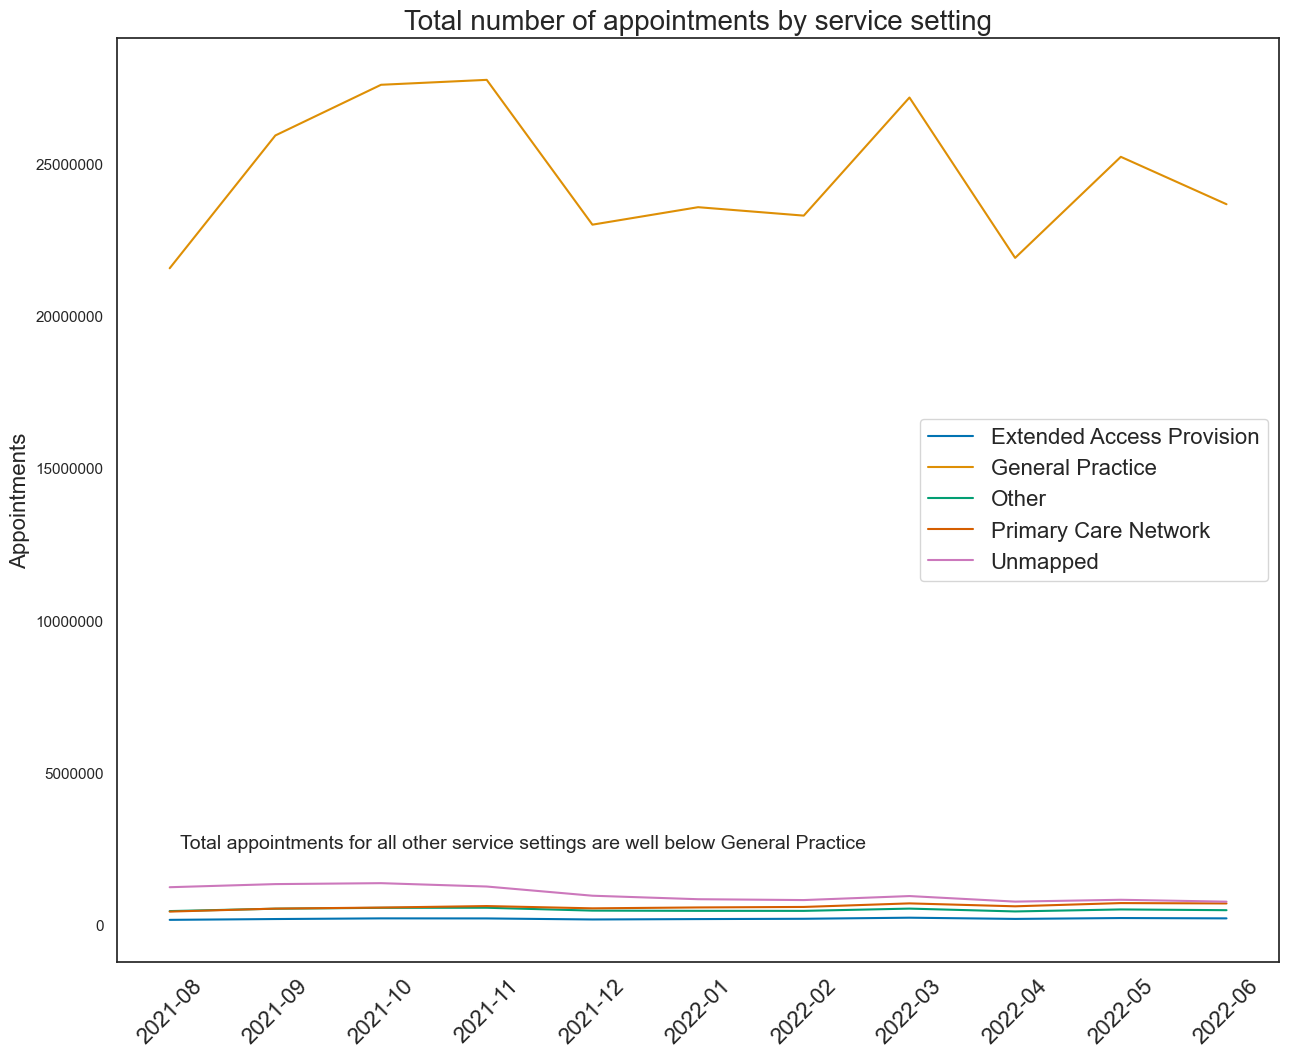

In [70]:
# Create visualisation for service_setting (nc_ss)

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')

# Create lineplot

nc_ss_plot = sns.lineplot(data = nc_ss,
             x = 'appointment_month', 
             y = 'count_of_appointments', 
             hue = 'service_setting',
             palette = 'colorblind',
             errorbar = None)

# Adjust labels
plt.title('Total number of appointments by service setting', size = 20)
plt.xlabel('')
plt.ylabel('Appointments', size = 16)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.legend(title = '', fontsize = '16')

nc_ss_plot.set_xticklabels(nc_ss_plot.get_xticklabels(), fontsize = '16', rotation = 45)
nc_ss_plot.text(.1, 2500000, 'Total appointments for all other service settings are well below General Practice', size = 14)

# Show plot
nc_ss_plot

# Save visualisation
plt.savefig('nc_ss_plot.png', dpi = 300)

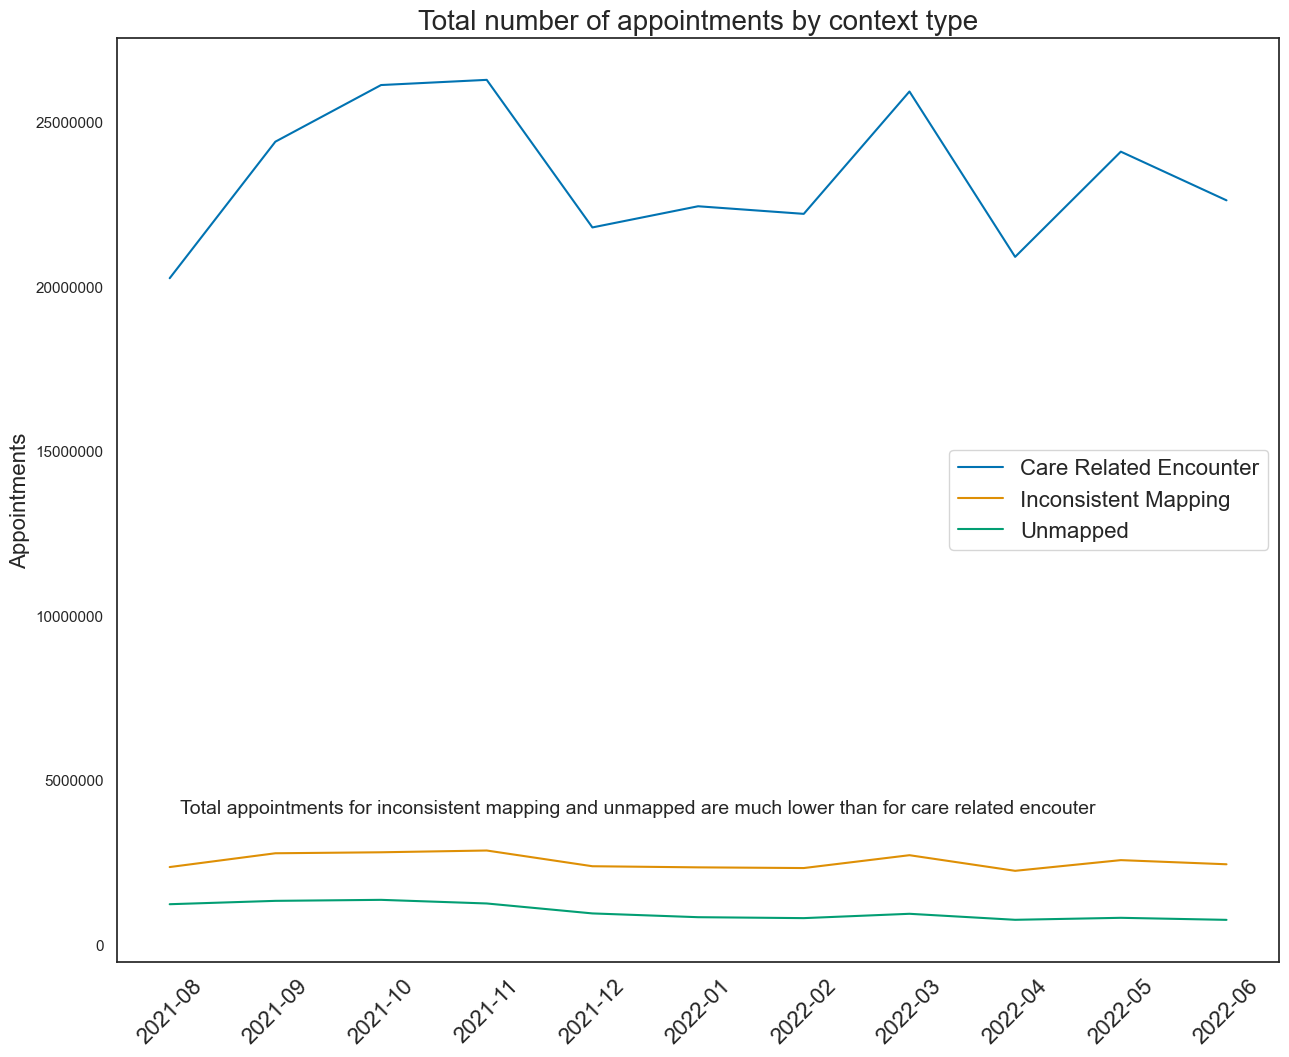

In [97]:
# Sum of appointments by month for each context type

nc_ct = nc.groupby(['appointment_month', 'context_type'])[['count_of_appointments']].agg(sum).reset_index()
nc_ct

# Create visualisation for context_type (nc_ct)

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')

# Create lineplot

nc_ct_plot = sns.lineplot(data = nc_ct,
             x = 'appointment_month', 
             y = 'count_of_appointments', 
             hue = 'context_type', 
             palette = 'colorblind',
             errorbar = None)

# Adjust labels
plt.title('Total number of appointments by context type', size = 20)
plt.xlabel('')
plt.ylabel('Appointments', size = 16)
plt.ticklabel_format(style ='plain', axis ='y')
plt.legend(title = '', fontsize = '16', loc = 'center right')

nc_ct_plot.set_xticklabels(nc_ct_plot.get_xticklabels(), fontsize = '16', rotation = 45)
nc_ct_plot.text(.1, 4000000, 'Total appointments for inconsistent mapping and unmapped are much lower than for care related encouter', size = 14)

# Show plot
nc_ct_plot

# Save visualisation
plt.savefig('nc_ct_plot.png', dpi = 300)

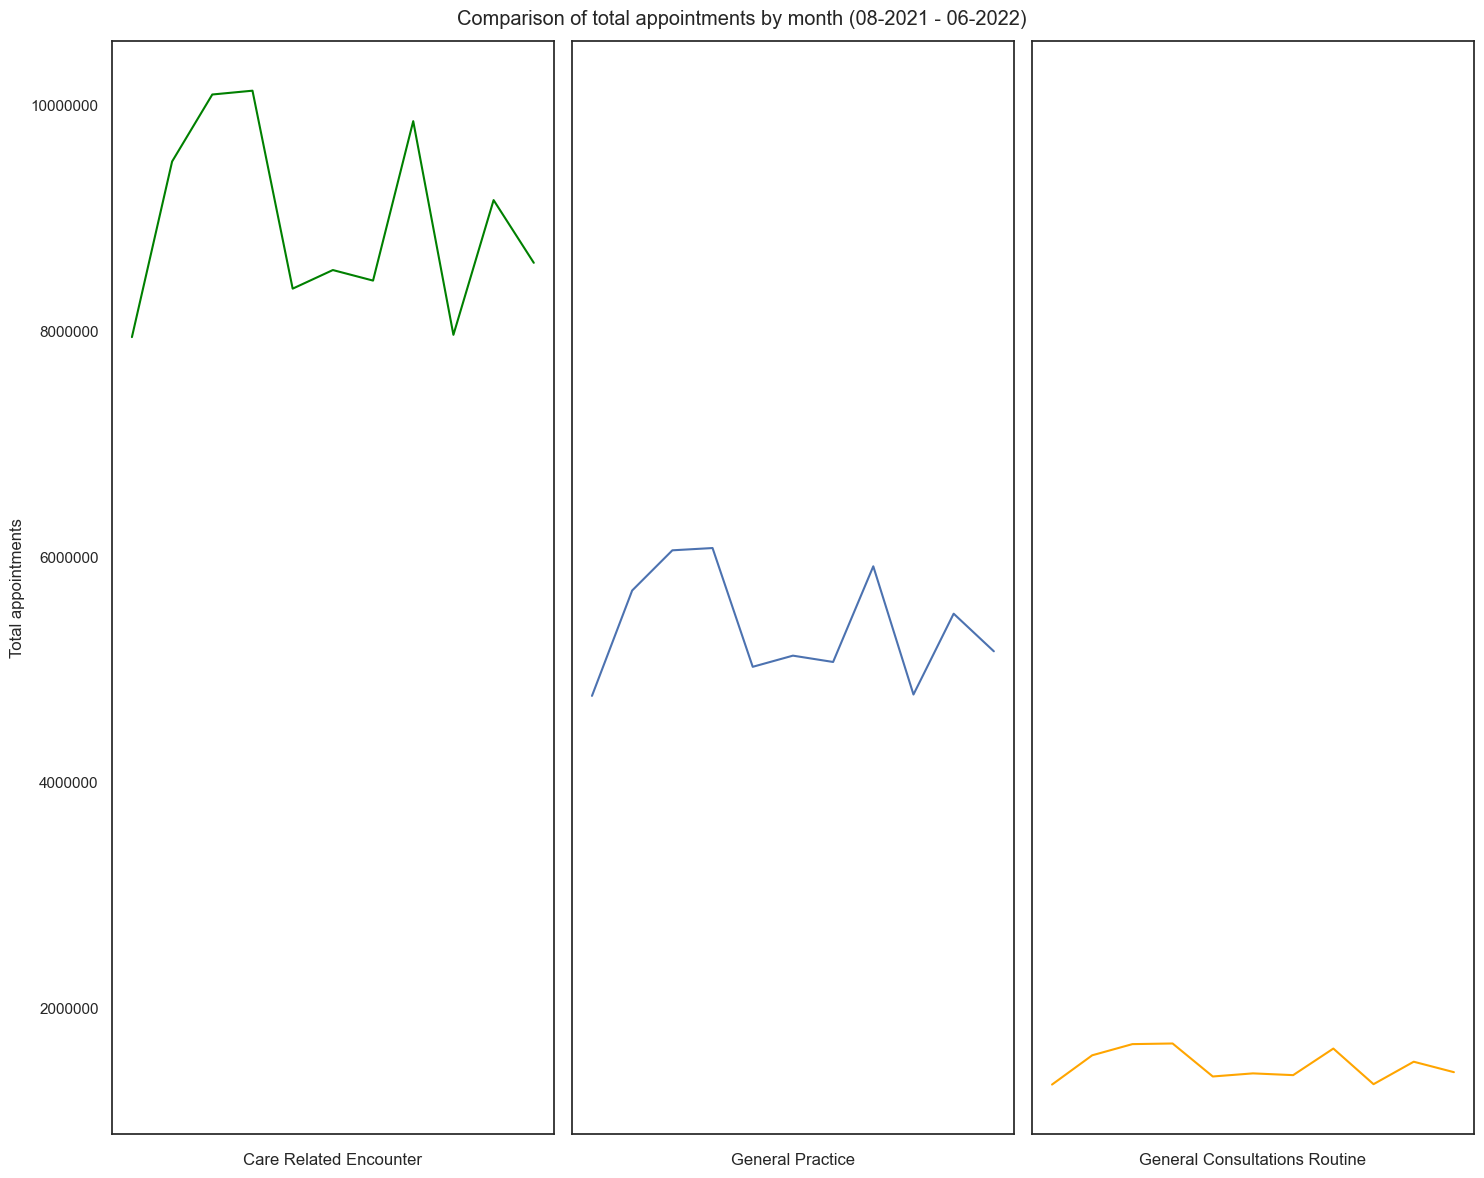

In [98]:
# Create 3 side by side subplots to compare categories with highest appointment values

# nc_ss = service_setting = General Practice
# nc_nc = national_category = General Consultations Routine
# nc_ct = context_type = Care Related Encounter


# Specify number of columns/row, plus sharing same y axis
fig, axes = plt.subplots(1, 3, sharey=True)


# Plot data using indexing to specify location

sns.lineplot(ax = axes[0],
             x = nc_ct['appointment_month'], 
             y = nc_ct['count_of_appointments'], 
             data = nc_ct['context_type'] == 'Care Related Encounter',
             errorbar = None,
             color = 'green')

sns.lineplot(ax = axes[1],
             x = nc_ss['appointment_month'], 
             y = nc_ss['count_of_appointments'], 
             data = nc_ss['service_setting'] == 'General Practice',
             errorbar = None)

sns.lineplot(ax = axes[2],
             x = nc_nc['appointment_month'], 
             y = nc_nc['count_of_appointments'], 
             data = nc_nc['national_category'] == 'General Consultations Routine',
             errorbar = None,
             color = 'orange')            

# Adjust y axis scale to remove 1e7
plt.ticklabel_format(style = 'plain', axis = 'y')

# Add/remove labels
axes[0].set_xlabel('Care Related Encounter')
axes[1].set_xlabel('General Practice')
axes[2].set_xlabel('General Consultations Routine')
axes[0].set_ylabel('Total appointments')

# Remove x axis ticks for first two charts
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])

# Add titles
plt.suptitle('Comparison of total appointments by month (08-2021 - 06-2022)')

# Apply tight layout to make it more condensed
fig.tight_layout()

# Save visualisation
plt.savefig('nc_appts_compare.png', dpi = 300)

In [99]:
# Number of appointments for each service setting by season

# Calculate sum of count_of_appointments
# Create nc_ss_m

nc_ss_m = nc.groupby([nc['appointment_date'].dt.month, nc['service_setting']]).agg({'count_of_appointments':sum}).reset_index()

<Figure size 1500x1200 with 0 Axes>

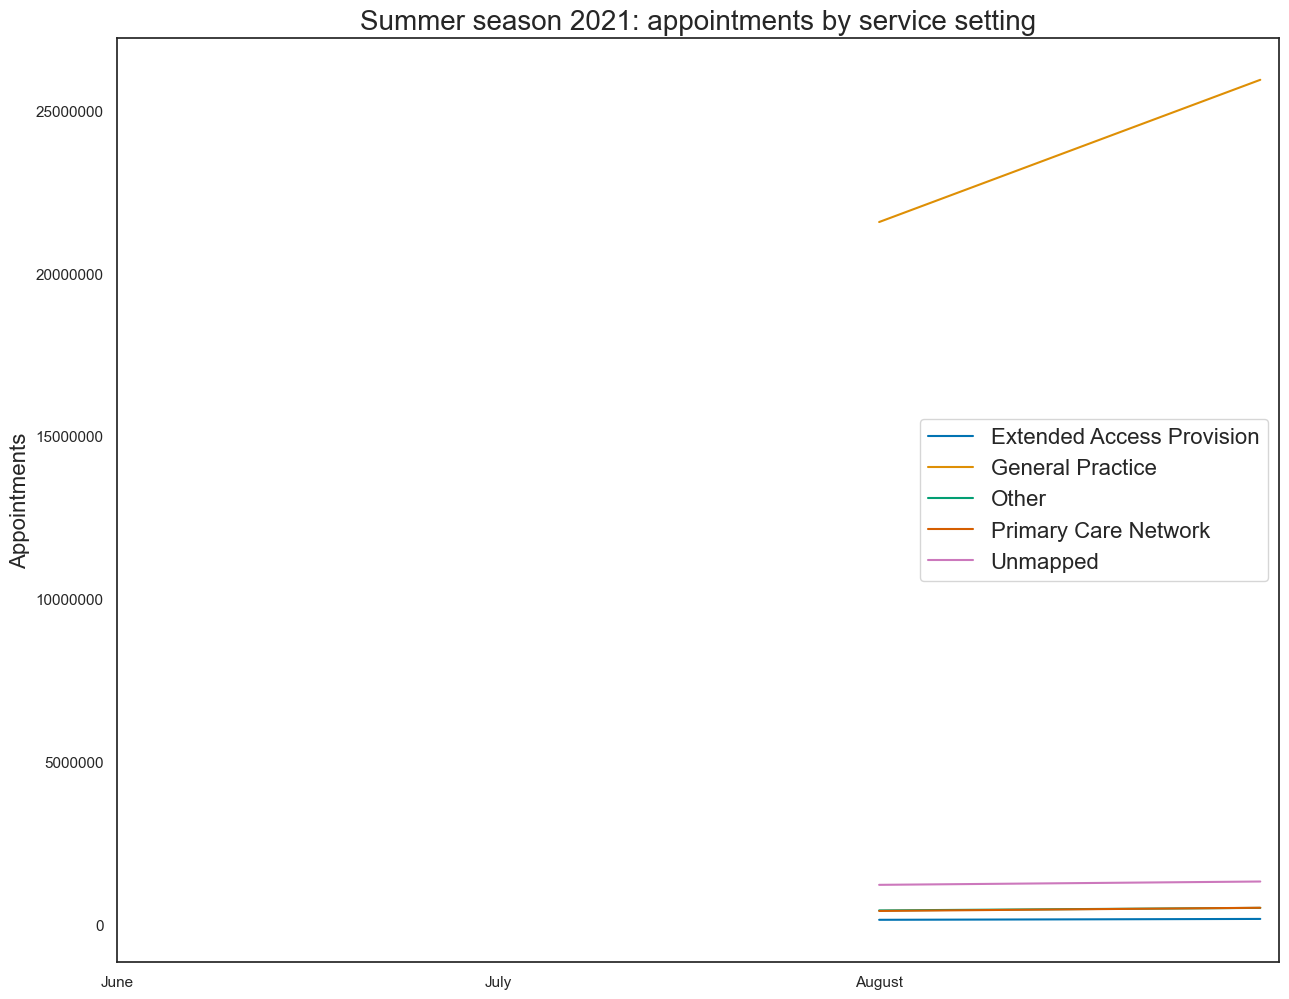

In [88]:
# Summer season
# 2021-06 - 2021-08
# Create visualisation
# Only have data for August so adding in values for September to see the line

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')

# Create lineplot

nc_ss_summer = sns.lineplot(x = 'appointment_date',
                             y = 'count_of_appointments',
                             data = nc_ss_m[nc_ss_m['appointment_date'].between(7, 9)],
                             hue = 'service_setting',
                             palette = 'colorblind',
                             errorbar = None)

# Adjust labels
plt.title('Summer season 2021: appointments by service setting', size = 20)
plt.xlabel('')
plt.ylabel('Appointments', size = 16)
plt.ticklabel_format(style ='plain', axis ='y')
plt.legend(title = '', fontsize = '16', loc = 'center right')

# Adjust x axis and rename labels
plt.xticks([6, 7, 8], ['June', 'July', 'August'])

# Show plot
nc_ss_summer

# Save visualisation
plt.savefig('nc_ss_summer.png', dpi = 300)

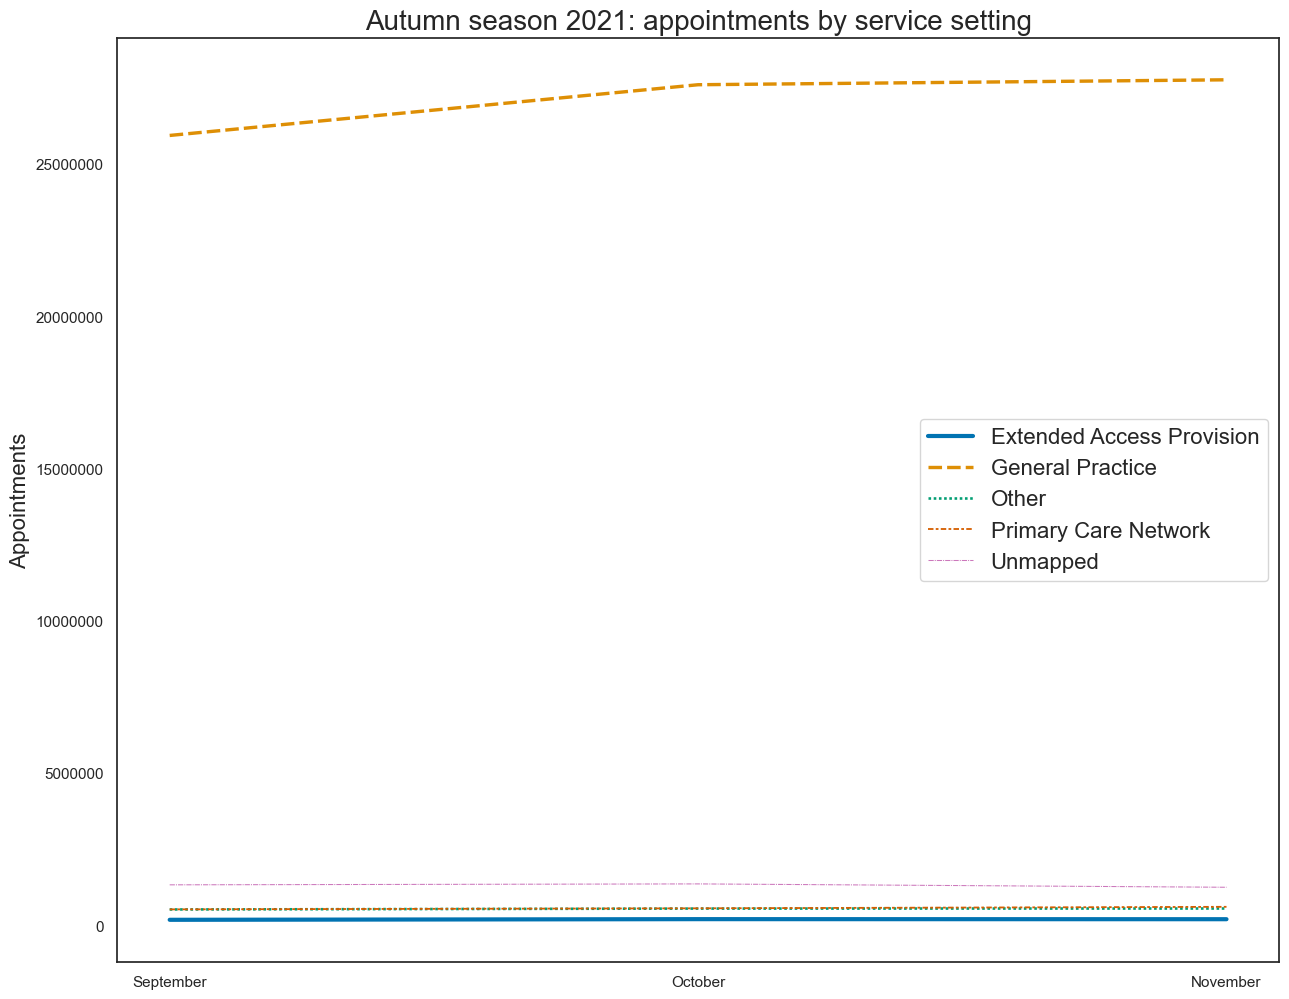

In [90]:
# Autumn
# 2021-09 - 2021-11

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')


# Create lineplot

nc_ss_autumn = sns.lineplot(x = 'appointment_date',
                             y = 'count_of_appointments',
                             data = nc_ss_m[nc_ss_m['appointment_date'].between(9, 11)],
                             hue = 'service_setting',
                             palette = 'colorblind',
                             style = 'service_setting',
                             size = 'service_setting',
                             errorbar = None)

# Adjust labels
plt.title('Autumn season 2021: appointments by service setting', size = 20)
plt.xlabel('')
plt.ylabel('Appointments', size = 16)
plt.ticklabel_format(style ='plain', axis ='y')
plt.legend(title = '', fontsize = '16', loc = 'center right')

# Adjust x axis and rename labels
plt.xticks([9, 10, 11], ['September', 'October', 'November'])

# Show plot
nc_ss_autumn

# Save visualisation
plt.savefig('nc_ss_autumn.png', dpi = 300)

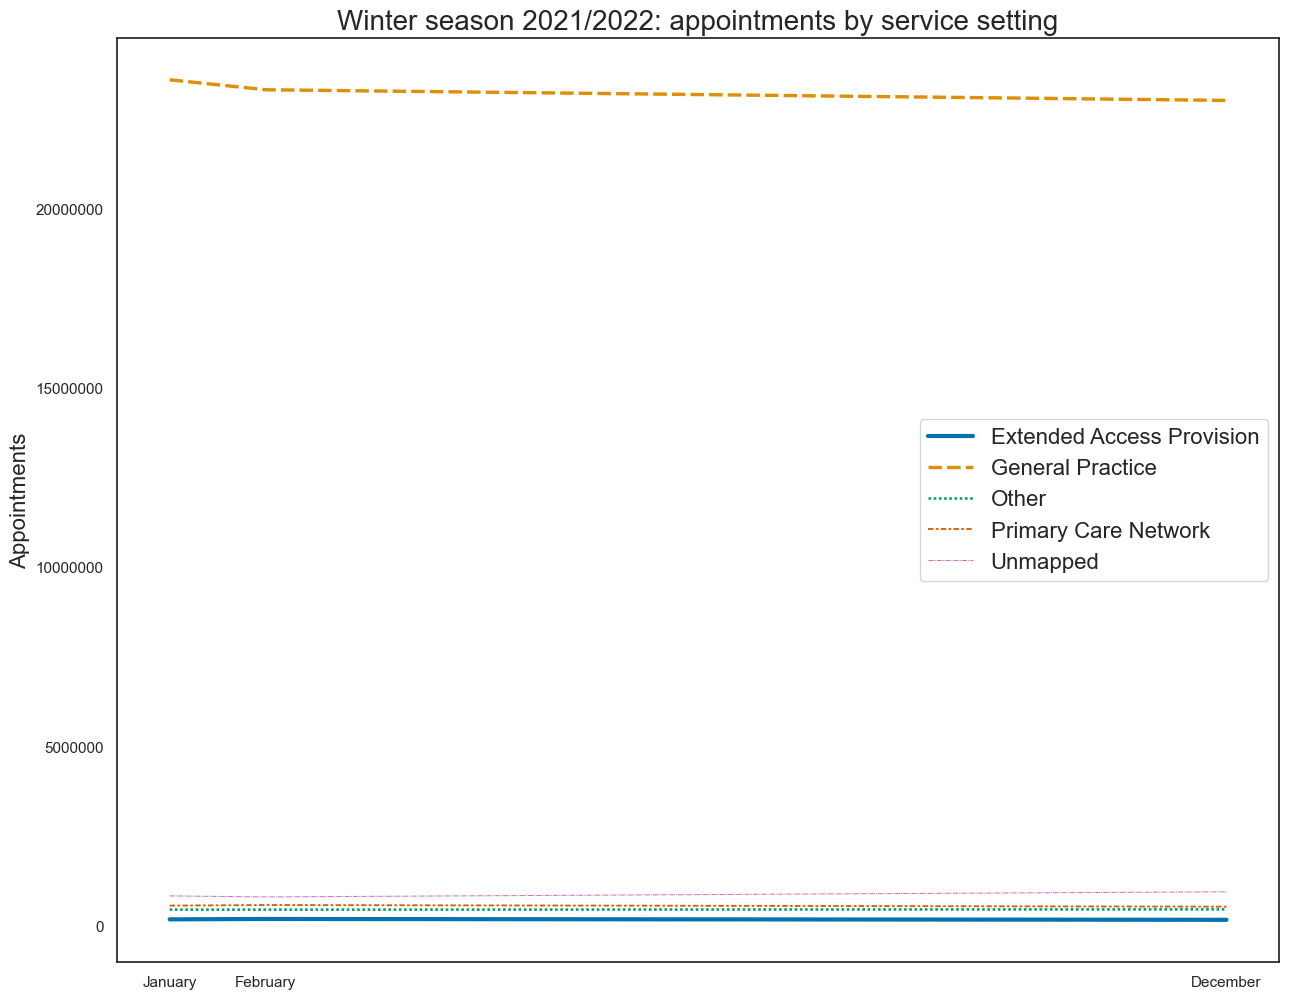

In [92]:
# Winter
# 2021-12 - 2022-02

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')

# Create lineplot using nc_ss_day
# Can't use .between because need 1, 2 and 12

nc_ss_winter = sns.lineplot(x = 'appointment_date',
                             y = 'count_of_appointments',
                             #data = nc_ss_m[nc_ss_m['appointment_date'].between(12, 11)],
                             data = nc_ss_m[(nc_ss_m['appointment_date'] == 12) | (nc_ss_m['appointment_date'] == 1) | (nc_ss_m['appointment_date'] == 2)],
                             hue = 'service_setting',
                             palette = 'colorblind',
                             style = 'service_setting',
                             size = 'service_setting',
                             errorbar = None)

# Adjust labels
plt.title('Winter season 2021/2022: appointments by service setting', size = 20)
plt.xlabel('')
plt.ylabel('Appointments', size = 16)
plt.ticklabel_format(style ='plain', axis ='y')
plt.legend(title = '', fontsize = '16', loc = 'center right')

# Adjust x axis and rename labels
plt.xticks([12, 1, 2], ['December', 'January', 'February'])

# Show plot
nc_ss_winter

# Save visualisation
plt.savefig('nc_ss_winter.png', dpi = 300)

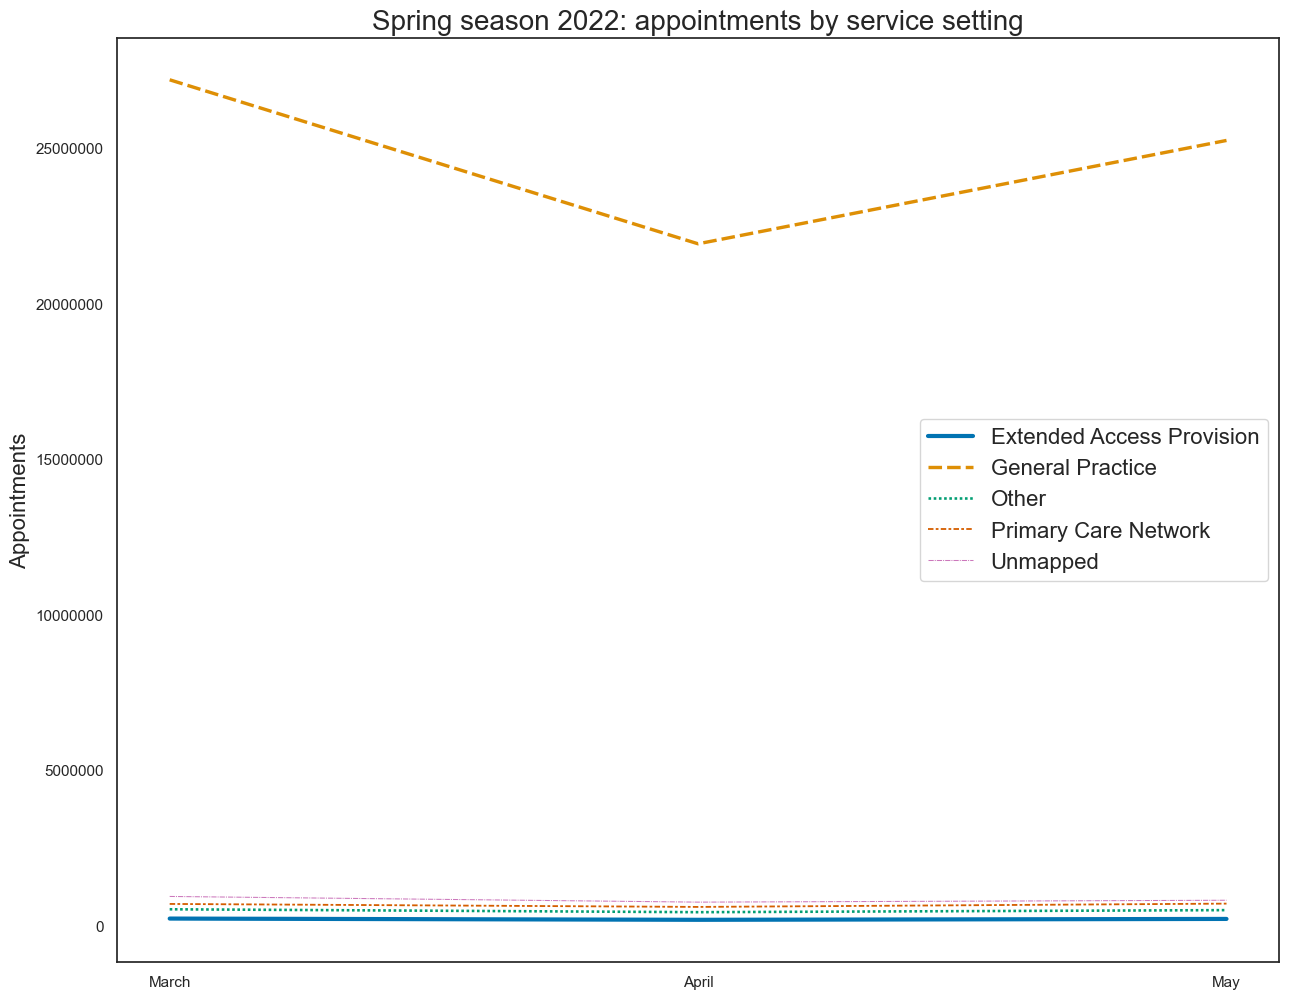

In [93]:
# Spring
# 2022-03 - 2022-05
# Create visualisation for service_setting using nc_ss_day where month is number

# Set figure size
sns.set(rc={'figure.figsize':(15, 12)})
plt.figure(figsize = (15, 12))

# Set colour style
sns.set_style('white')


# Create lineplot

nc_ss_spring = sns.lineplot(x = 'appointment_date',
                             y = 'count_of_appointments',
                             data = nc_ss_m[nc_ss_m['appointment_date'].between(3, 5)],
                             hue = 'service_setting',
                             palette = 'colorblind',
                             style = 'service_setting',
                             size = 'service_setting',
                             errorbar = None)

# Adjust labels
plt.title('Spring season 2022: appointments by service setting', size = 20)
plt.xlabel('')
plt.ylabel('Appointments', size = 16)
plt.ticklabel_format(style ='plain', axis ='y')
plt.legend(title = '', fontsize = '16', loc = 'center right')

# Adjust x axis and rename labels
plt.xticks([3, 4, 5], ['March', 'April', 'May'])

# Show plot
nc_ss_spring

# Save visualisation
plt.savefig('nc_ss_spring.png', dpi = 300)

In [94]:
# Rather than copying code as above and adjusting parameters, I created functions

In [112]:
set_up_plot()

The plot is set up; start making your visualisation.


<Figure size 1500x1200 with 0 Axes>

(<Axes: title={'center': 'Appointments by heathcare professional'}, xlabel=' '>,
 None)

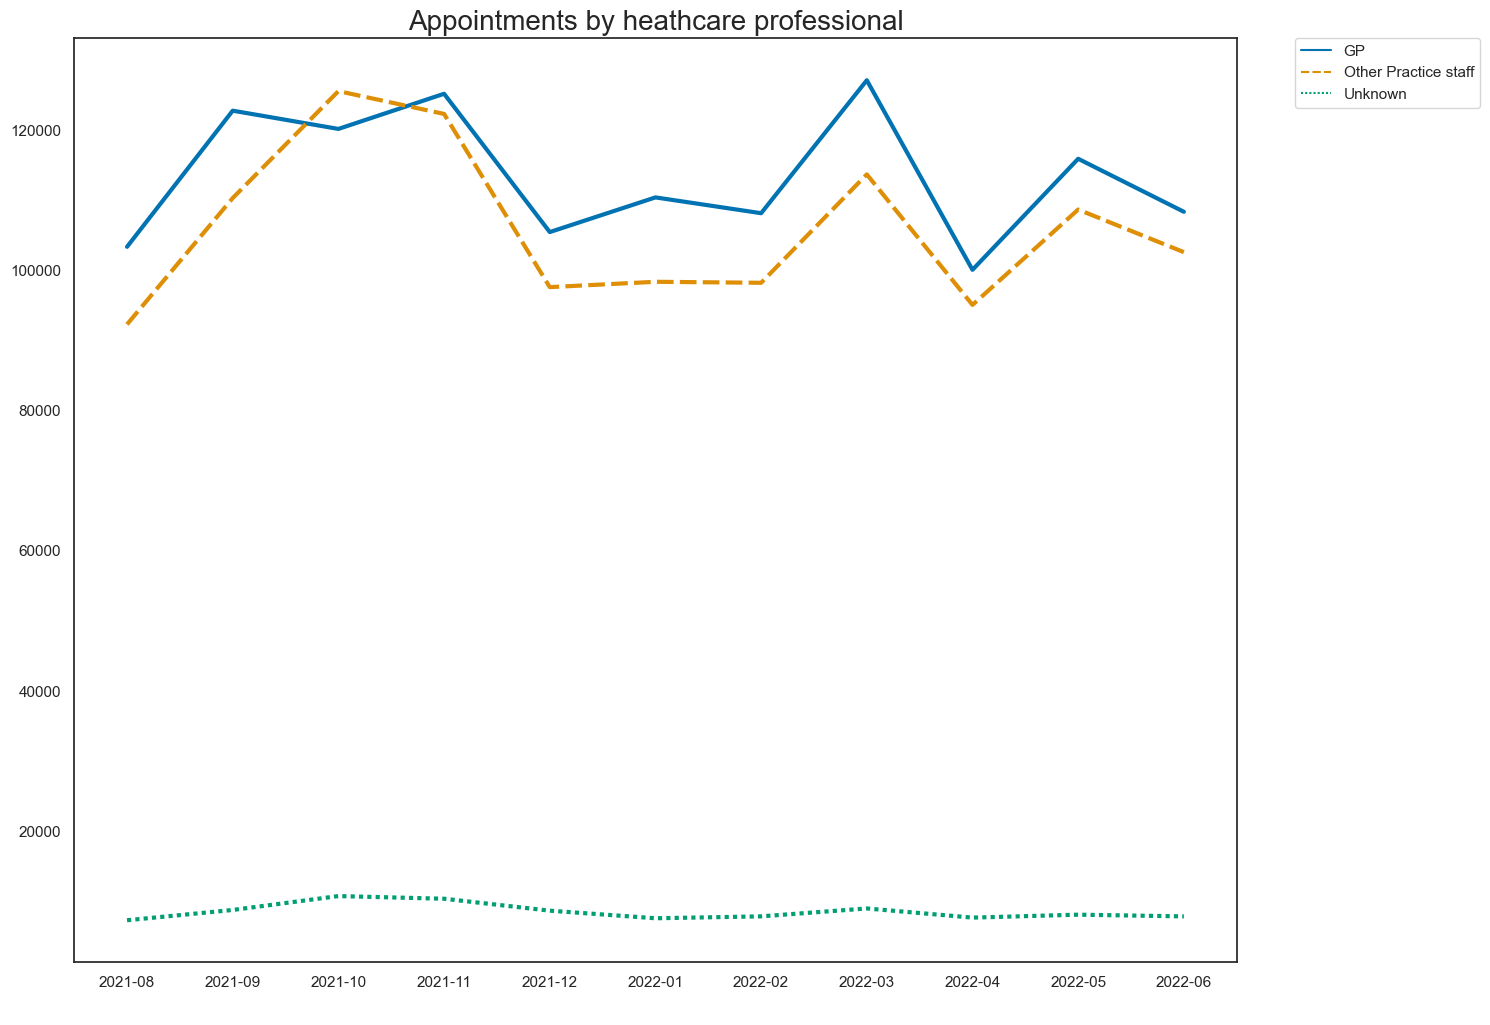

In [113]:
# Lineplot showing healthcare types over time

create_lineplot('ar_hcp_month', ar_agg, 'appointment_month', 'count_of_appointments', 
                'hcp_type', 'hcp_type',
                'Appointments by heathcare professional', ' ', '', 'ar_hcp_month.png')

(<Axes: title={'center': 'Appointments by status'}, xlabel=' '>, None)

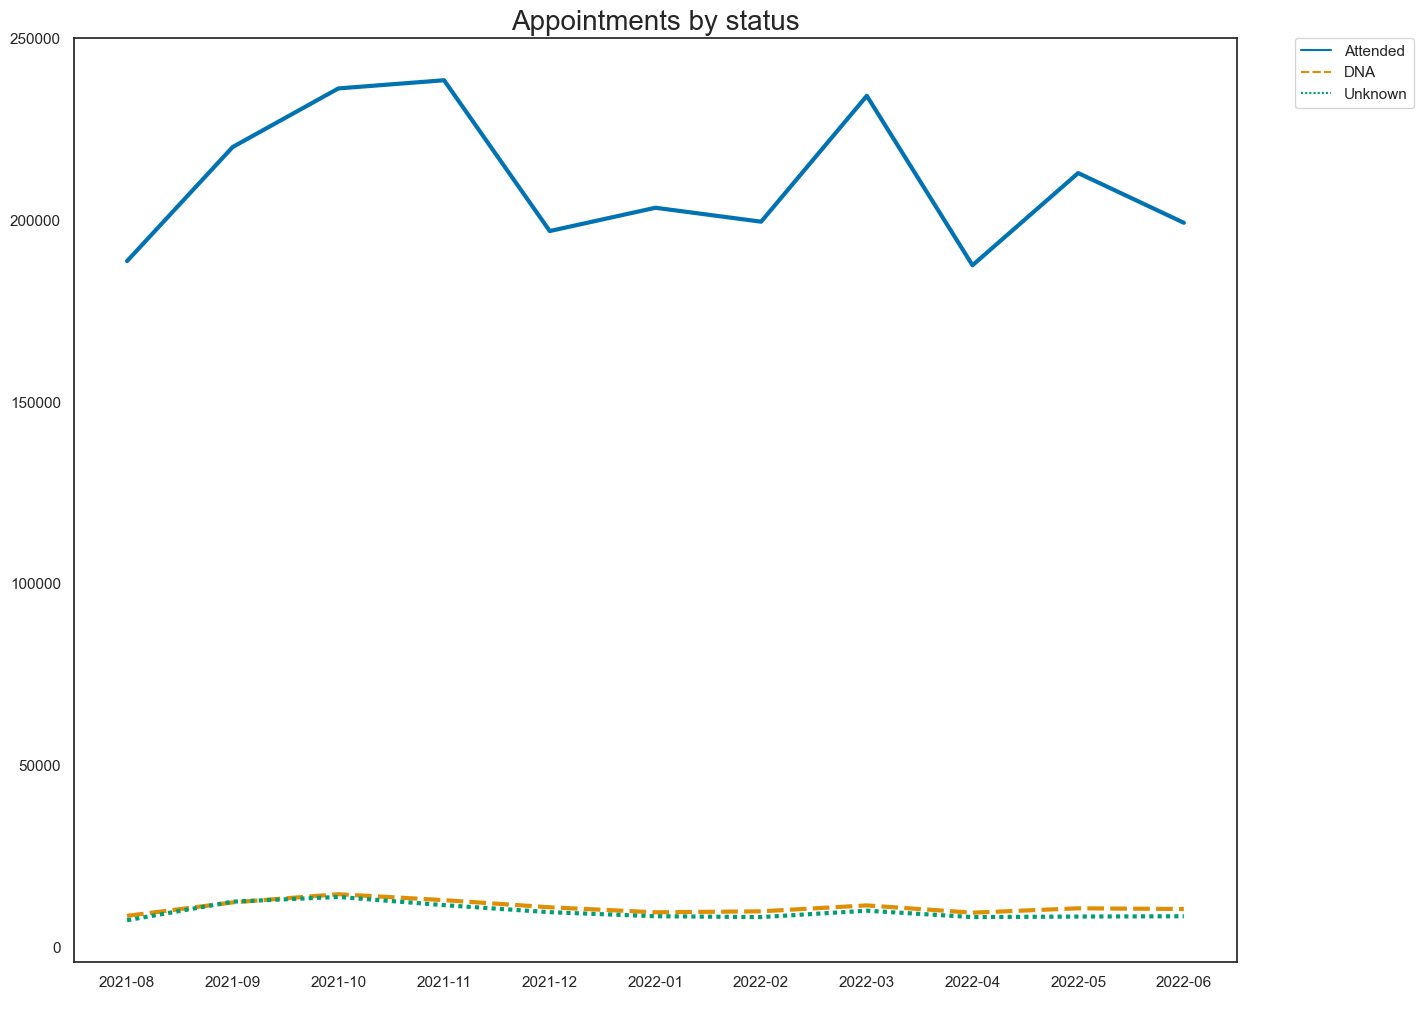

In [114]:
# Lineplot with appointment status over time

create_lineplot('ar_status', ar_agg, 'appointment_month', 'count_of_appointments', 'appointment_status', 'appointment_status',
                'Appointments by status', ' ', '', 'ar_status.png')

(<Axes: title={'center': 'Appointments by status (excluding unknown)'}, xlabel=' '>,
 None)

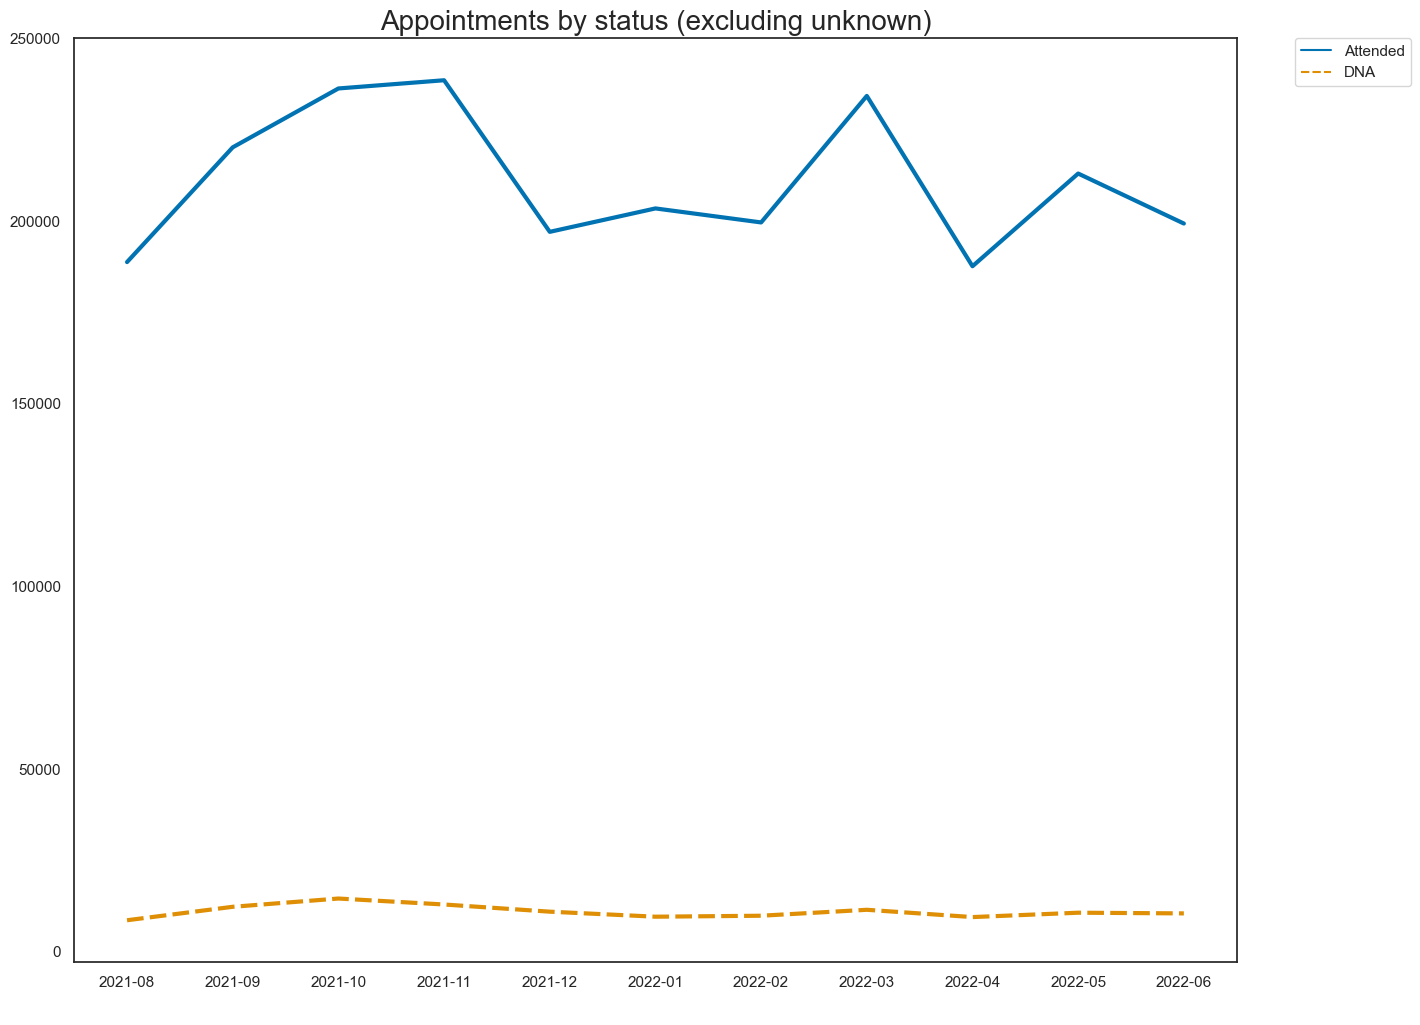

In [115]:
# Lineplot with appointment status over time (excluding unknown)

create_lineplot('ar_status_ex', ar_agg[ar_agg['appointment_status'] != 'Unknown'], 
                'appointment_month', 'count_of_appointments', 'appointment_status', 'appointment_status',
                'Appointments by status (excluding unknown)', ' ', '', 'ar_status_ex.png')

(<Axes: title={'center': 'Appointments by status and healthcare professional'}, xlabel=' '>,
 None)

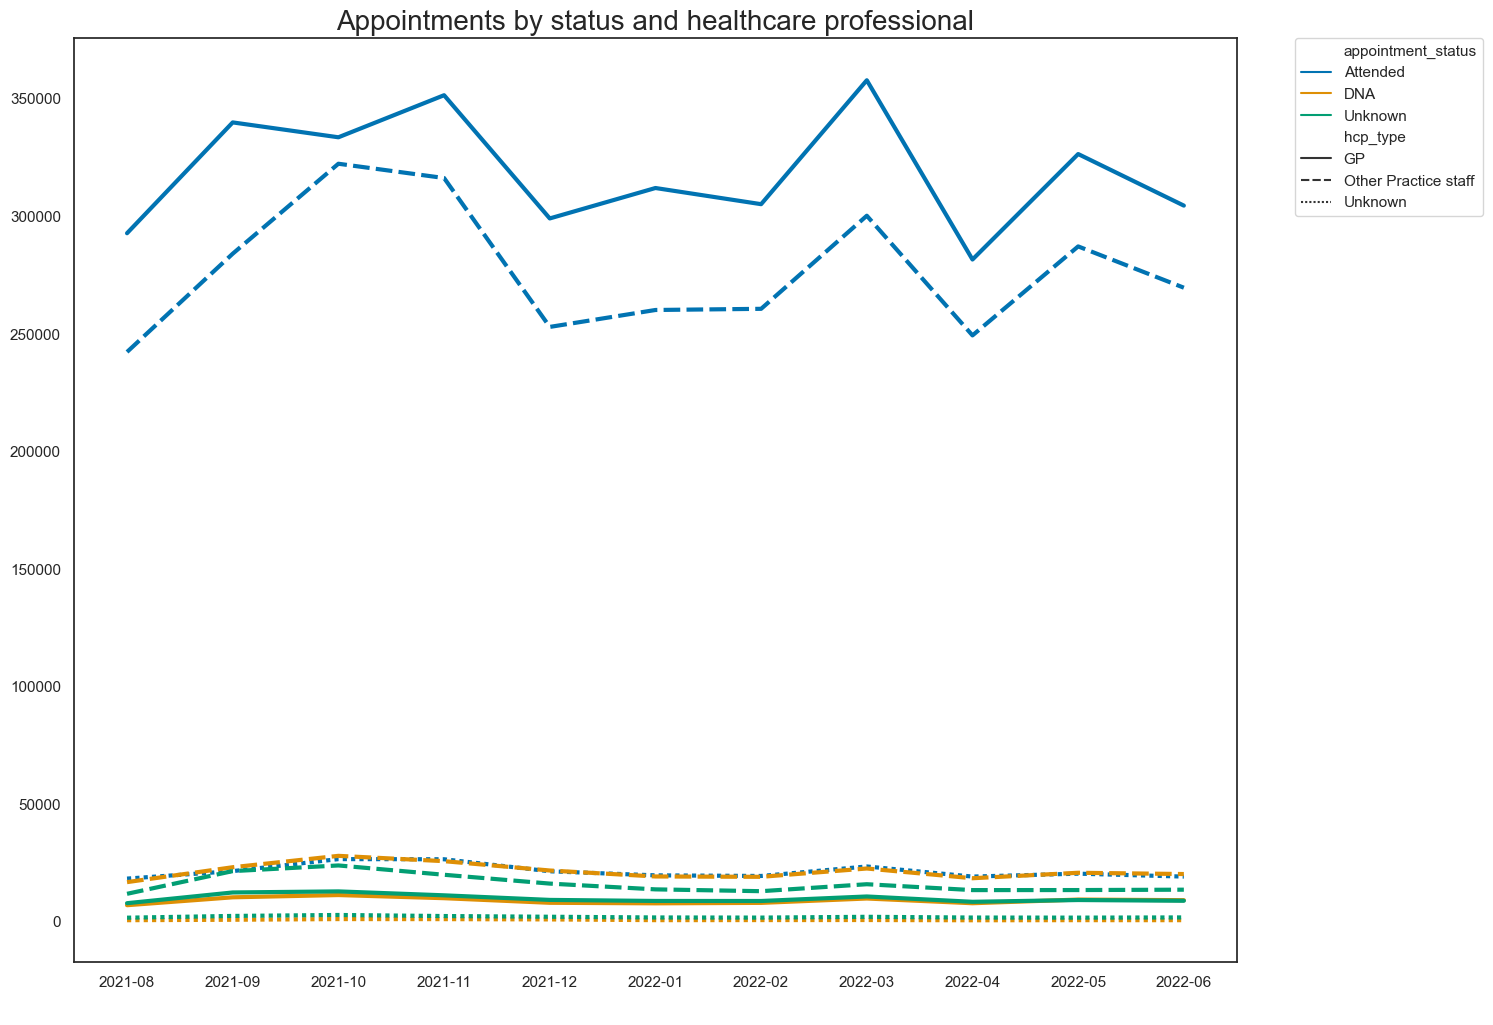

In [116]:
# Lineplot with appointment status and healthcare professional

create_lineplot('ar_status_hcp', ar_agg, 'appointment_month', 'count_of_appointments', 
                'appointment_status', 'hcp_type',
                'Appointments by status and healthcare professional', ' ', '', 'ar_status_hcp.png')

(<Axes: title={'center': 'Missed and unknown appointment status by healthcare professional'}, xlabel=' '>,
 None)

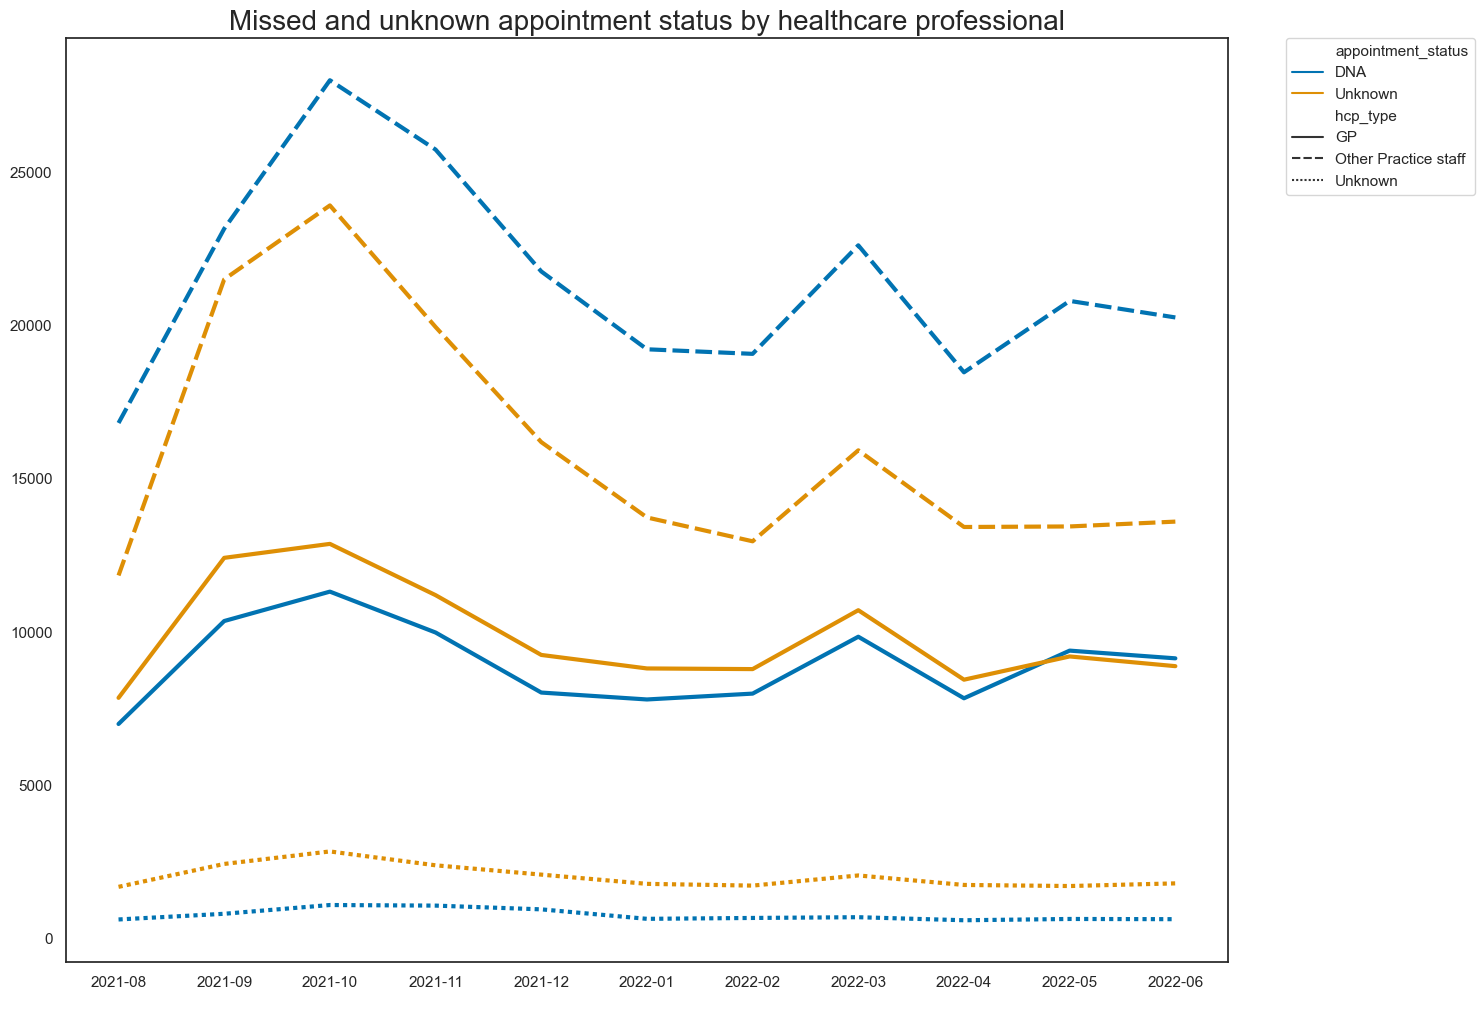

In [117]:
# Lineplot with appointment status and healthcare professional; exluding Attended

create_lineplot('ar_status_hcp_ex', ar_agg[ar_agg['appointment_status'] != 'Attended'], 
                'appointment_month', 'count_of_appointments', 
                'appointment_status', 'hcp_type',
                'Missed and unknown appointment status by healthcare professional', ' ', '', 'ar_status_hcp_ex.png')

(<Axes: title={'center': 'Missed and unknown appointments by appointment mode'}, xlabel=' '>,
 None)

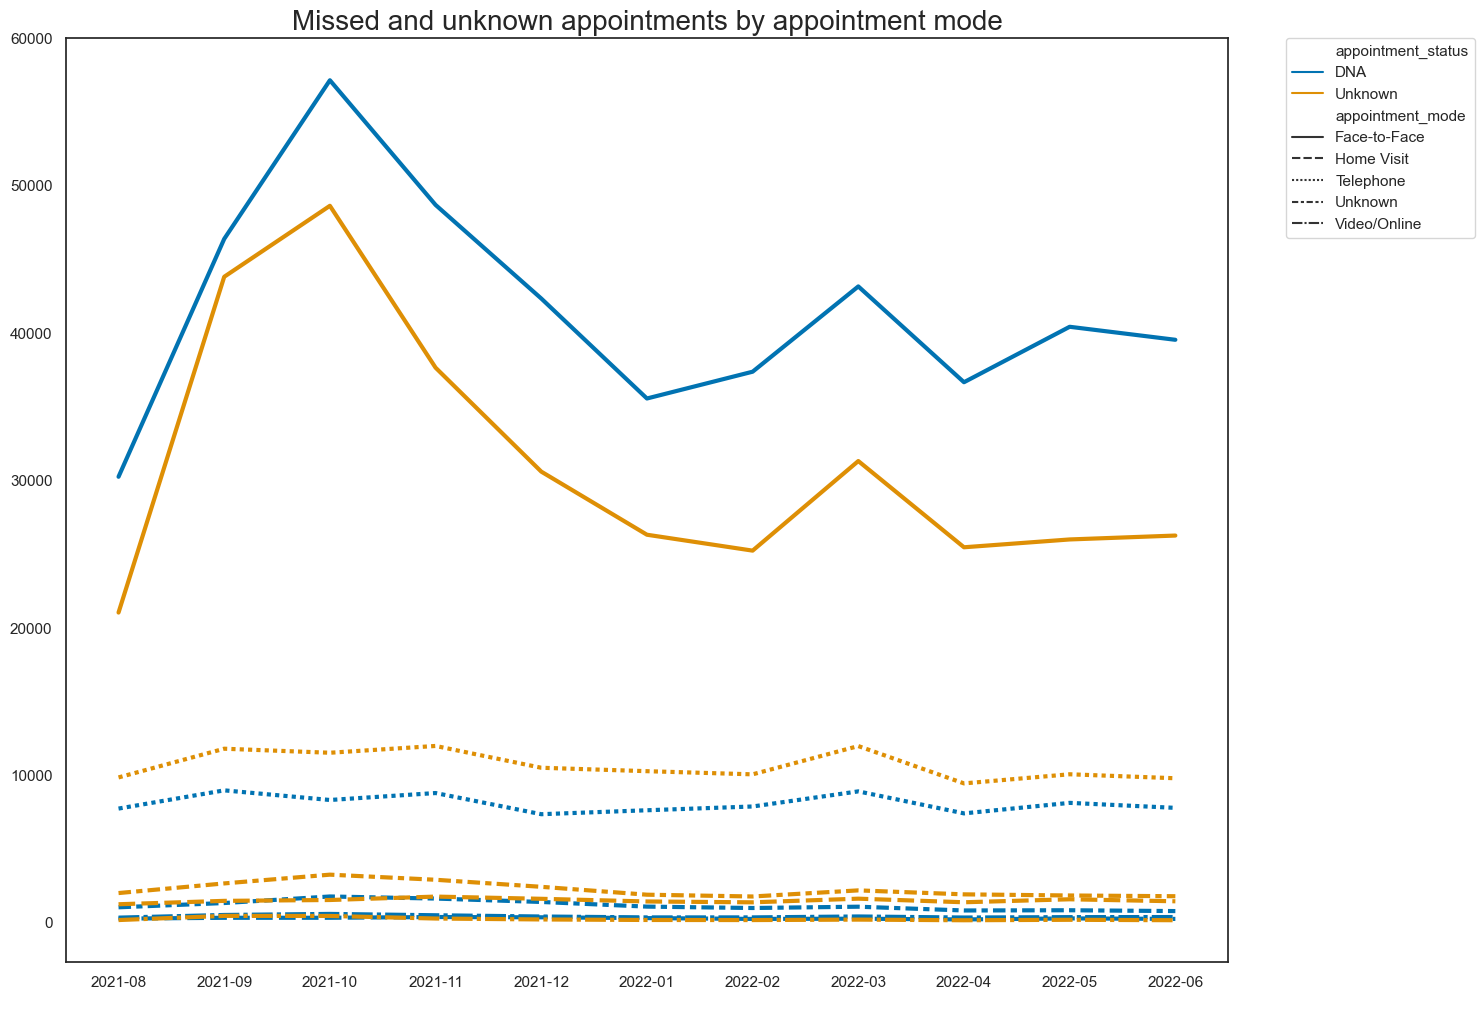

In [118]:
# Lineplot with appointment status (missed appointment) and appointment mode

create_lineplot('ar_status_mode', ar_agg[ar_agg['appointment_status'] != 'Attended'], 
                'appointment_month', 'count_of_appointments', 
                'appointment_status', 'appointment_mode',
                'Missed and unknown appointments by appointment mode', 
                ' ', '', 'ar_status_mode.png')

(<Axes: title={'center': 'Missed and unknown appointments by mode (excluding face-to-face)'}, xlabel=' '>,
 None)

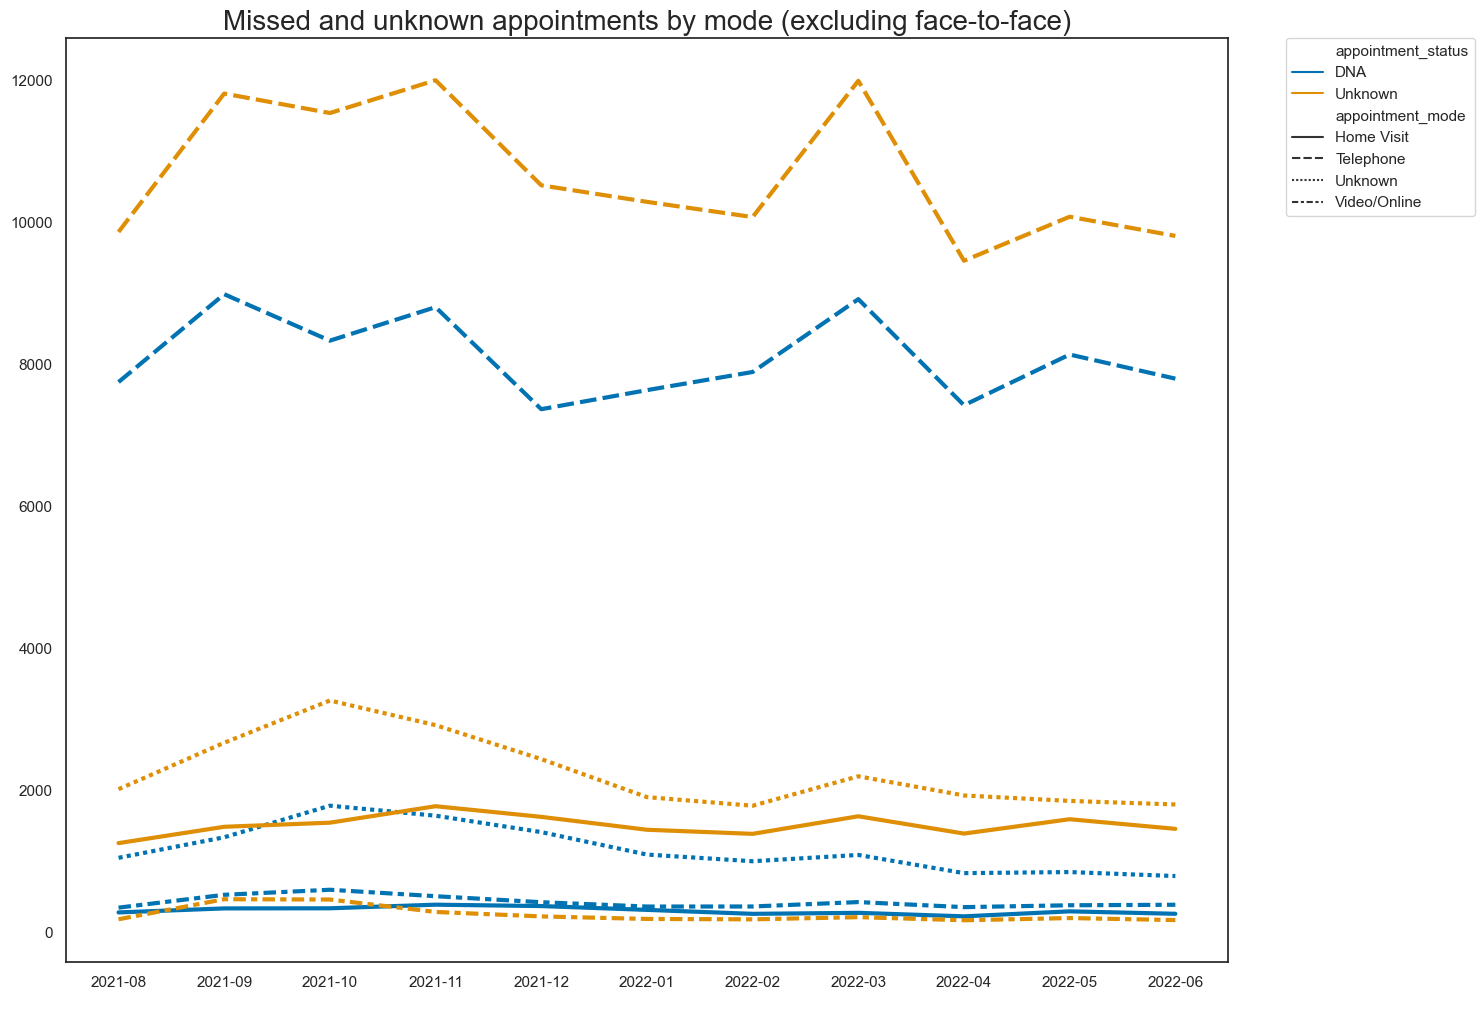

In [119]:
# Lineplot with appointment status (missed appointment) and appointment mode (exclude Face-to-face)

create_lineplot('ar_status_mode_ex', 
                ar_agg.loc[(ar_agg['appointment_status'] != 'Attended') & (ar_agg['appointment_mode'] != 'Face-to-Face')], 
                'appointment_month', 'count_of_appointments', 
                'appointment_status', 'appointment_mode',
                'Missed and unknown appointments by mode (excluding face-to-face)', 
                ' ', '', 'ar_status_mode_ex.png')

(<Axes: title={'center': 'Missed appointments by mode (excluding face-to-face)'}, xlabel=' '>,
 None)

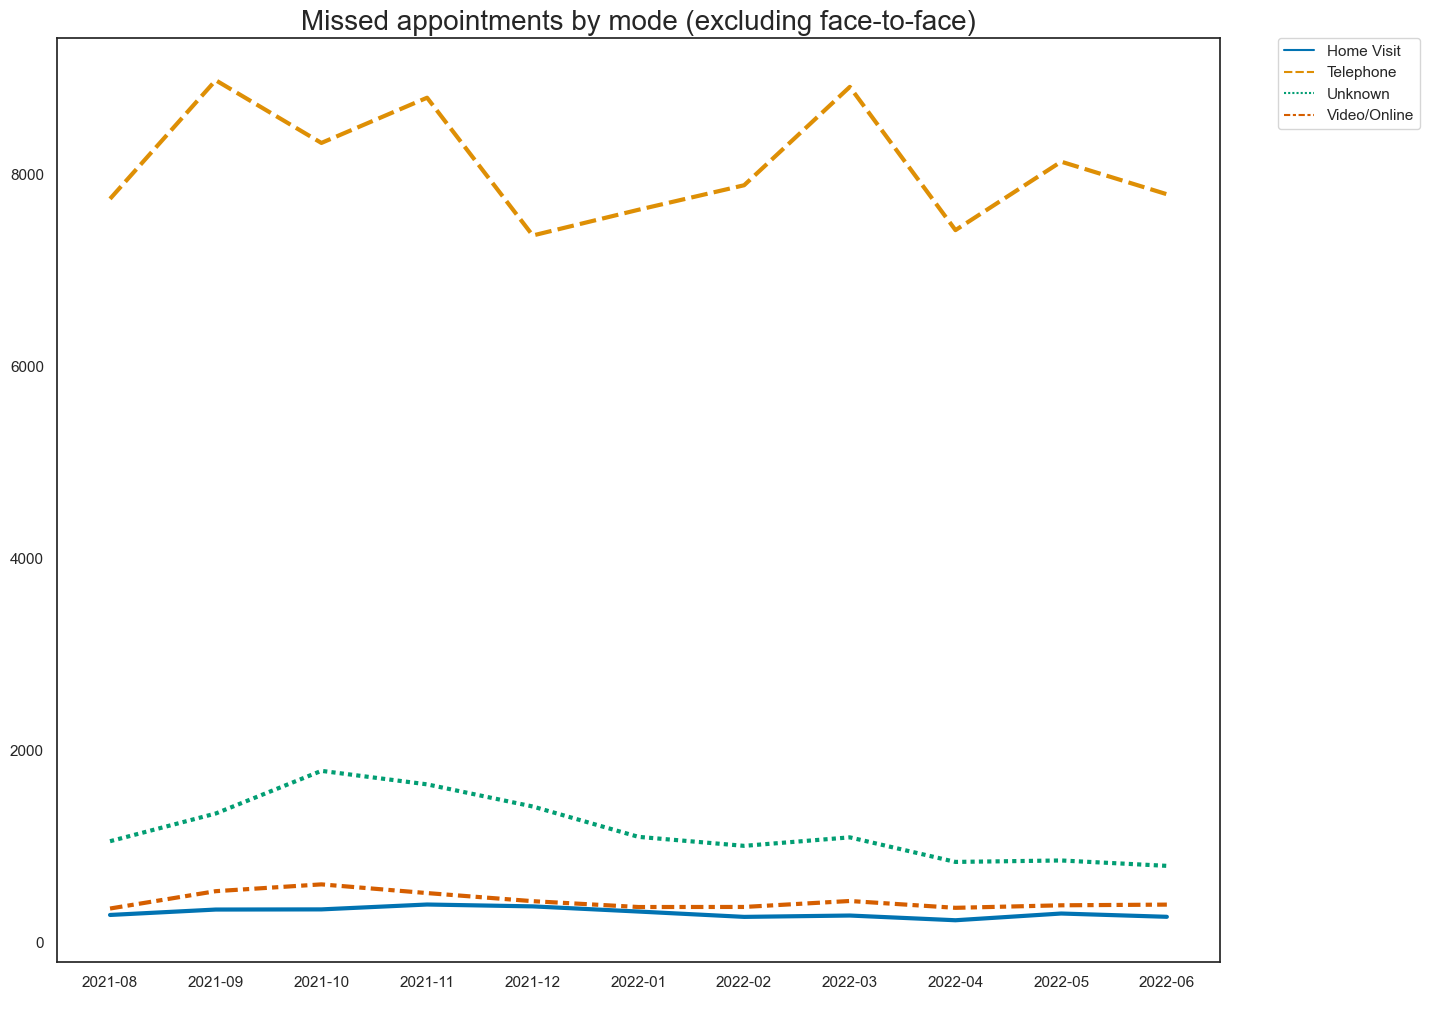

In [120]:
# Lineplot missed appointments (ex unknown) by appointment mode (exclude Face-to-face)

create_lineplot('ar_status_mode_ex_un',
                ar_agg.loc[~ar_agg['appointment_status'].isin(['Attended', 'Unknown']) & (ar_agg['appointment_mode'] != 'Face-to-Face')], 
                            'appointment_month', 'count_of_appointments', 
                'appointment_mode', 'appointment_mode',
                'Missed appointments by mode (excluding face-to-face)', 
                ' ', '', 'ar_status_mode_ex_un.png')

(<Axes: title={'center': 'Missed appointments by time between booked and appointment'}, xlabel=' '>,
 None)

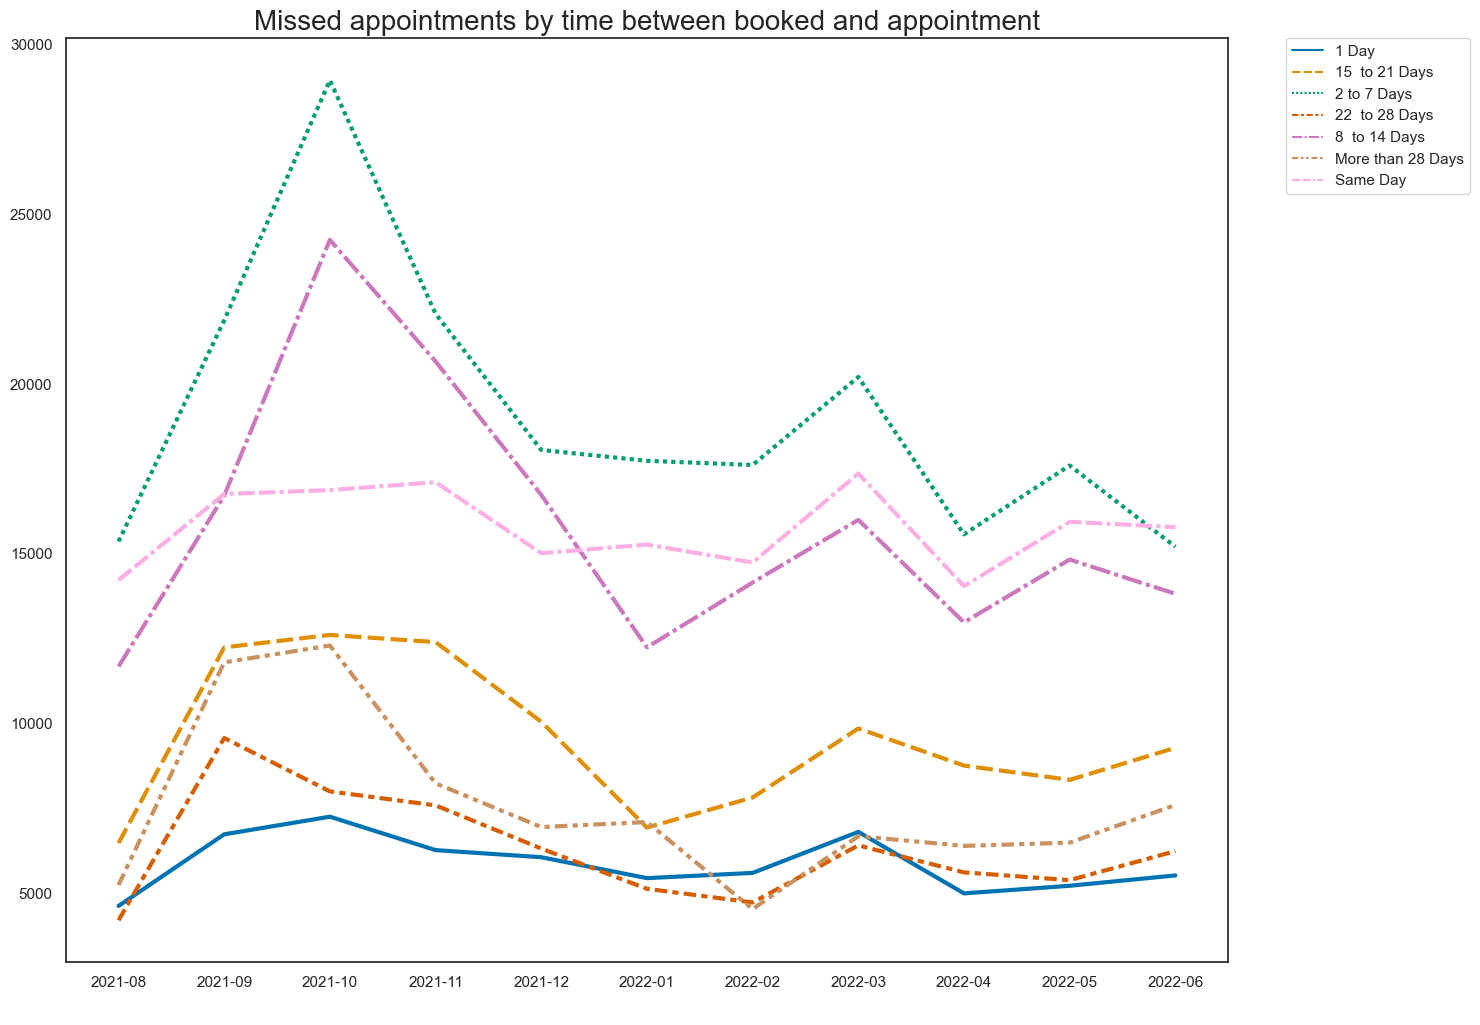

In [121]:
# Lineplot with missed appointments by time between booked and appointment

create_lineplot('ar_status_time', 
                ar_agg.loc[(ar_agg['appointment_status'] != 'Attended') & (ar_agg['time_between_book_and_appointment'] != 'Unknown / Data Quality')], 
                'appointment_month', 'count_of_appointments', 
                'time_between_book_and_appointment', 'time_between_book_and_appointment',
                'Missed appointments by time between booked and appointment', 
                ' ', '', 'ar_status_time.png')

(<Axes: title={'center': 'Appointments by appointment mode'}>, None)

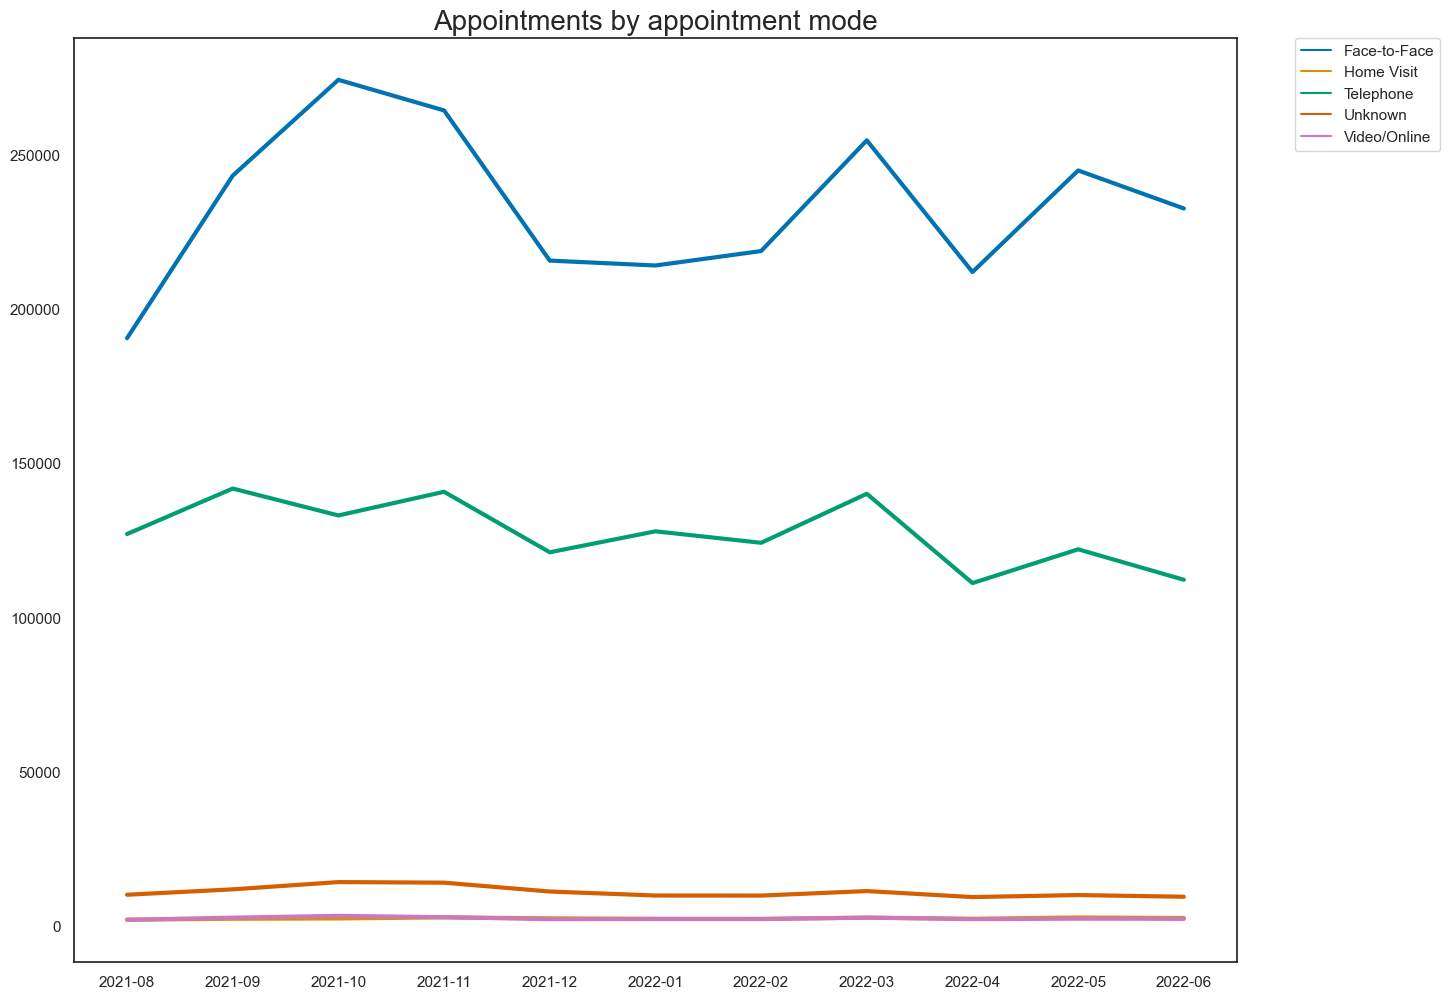

In [122]:
# Lineplot with appointment mode over time

create_lineplot('ar_mode', ar_agg, 'appointment_month', 'count_of_appointments', 
                'appointment_mode', None,
                'Appointments by appointment mode', '', '', 'ar_mode.png')

(<Axes: title={'center': 'Appointments by time between booked and appointment'}>,
 None)

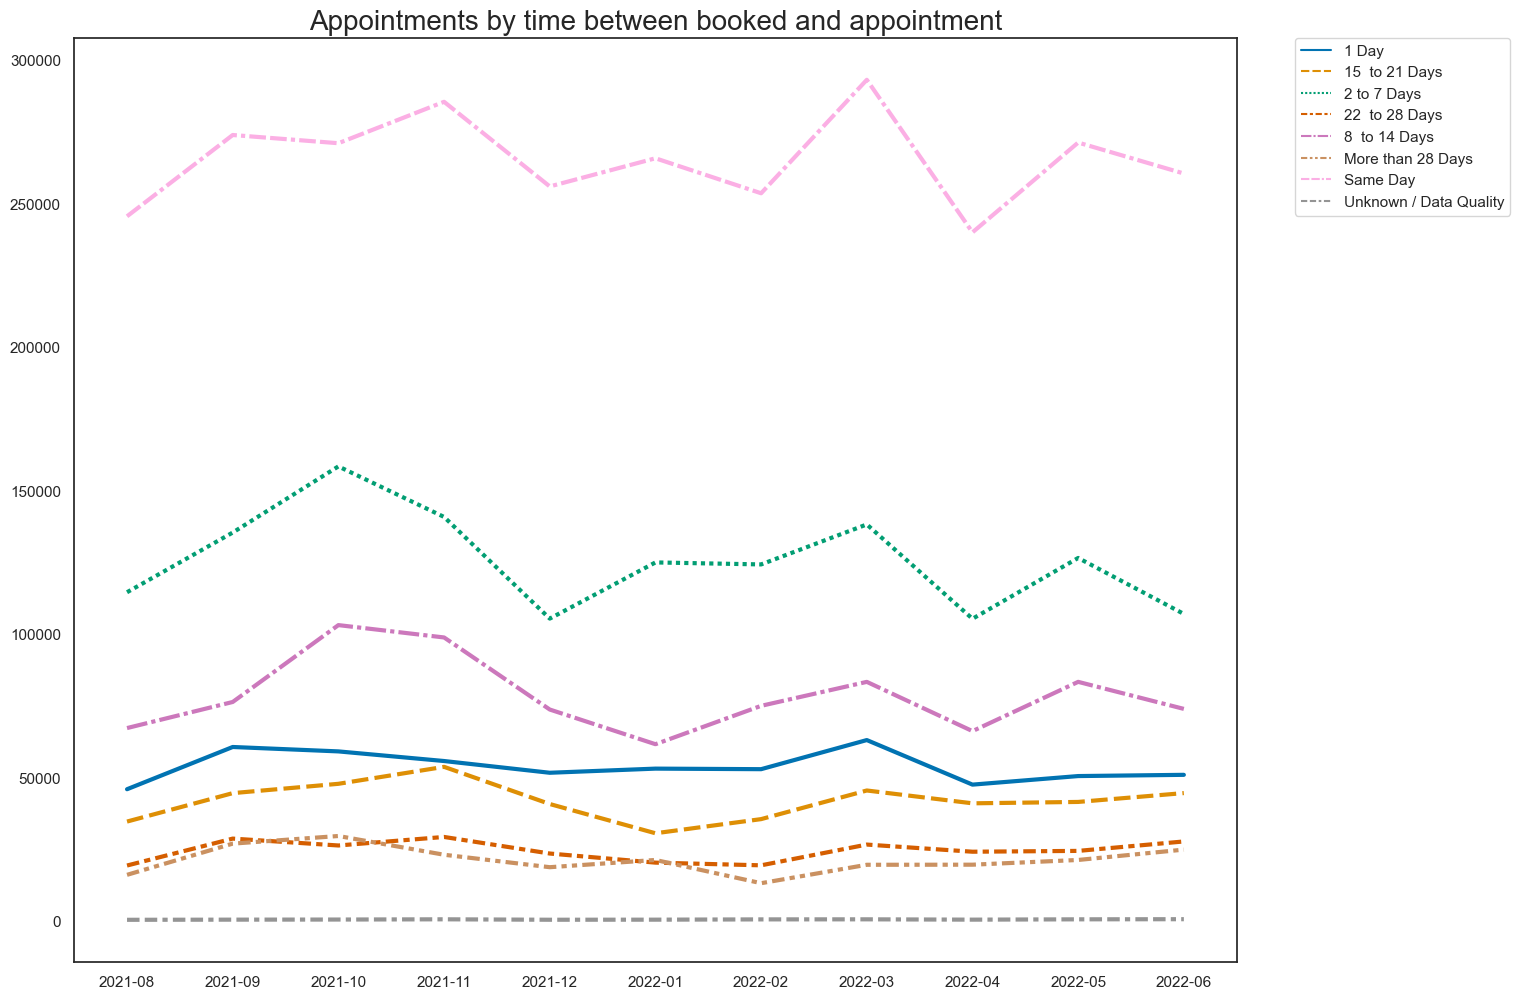

In [123]:
# Lineplot with appointment mode over time

create_lineplot('ar_time_book', ar_agg, 'appointment_month', 'count_of_appointments', 
                'time_between_book_and_appointment', 'time_between_book_and_appointment', 
                'Appointments by time between booked and appointment', '', '', 'ar_time_book.png')

In [124]:
# Create new dataframe and group by the sum of count of appointments
nc_agg = nc.groupby(['service_setting', 'context_type', 'national_category', 
                         'appointment_month'])[['count_of_appointments']].agg(sum).reset_index()

nc_agg.head()

,service_setting,context_type,national_category,appointment_month,count_of_appointments
0,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,2021-08,229
1,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,2021-09,312
2,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,2021-10,554
3,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,2021-11,553
4,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,2021-12,168


(<Axes: title={'center': 'Appointments by service setting'}>, None)

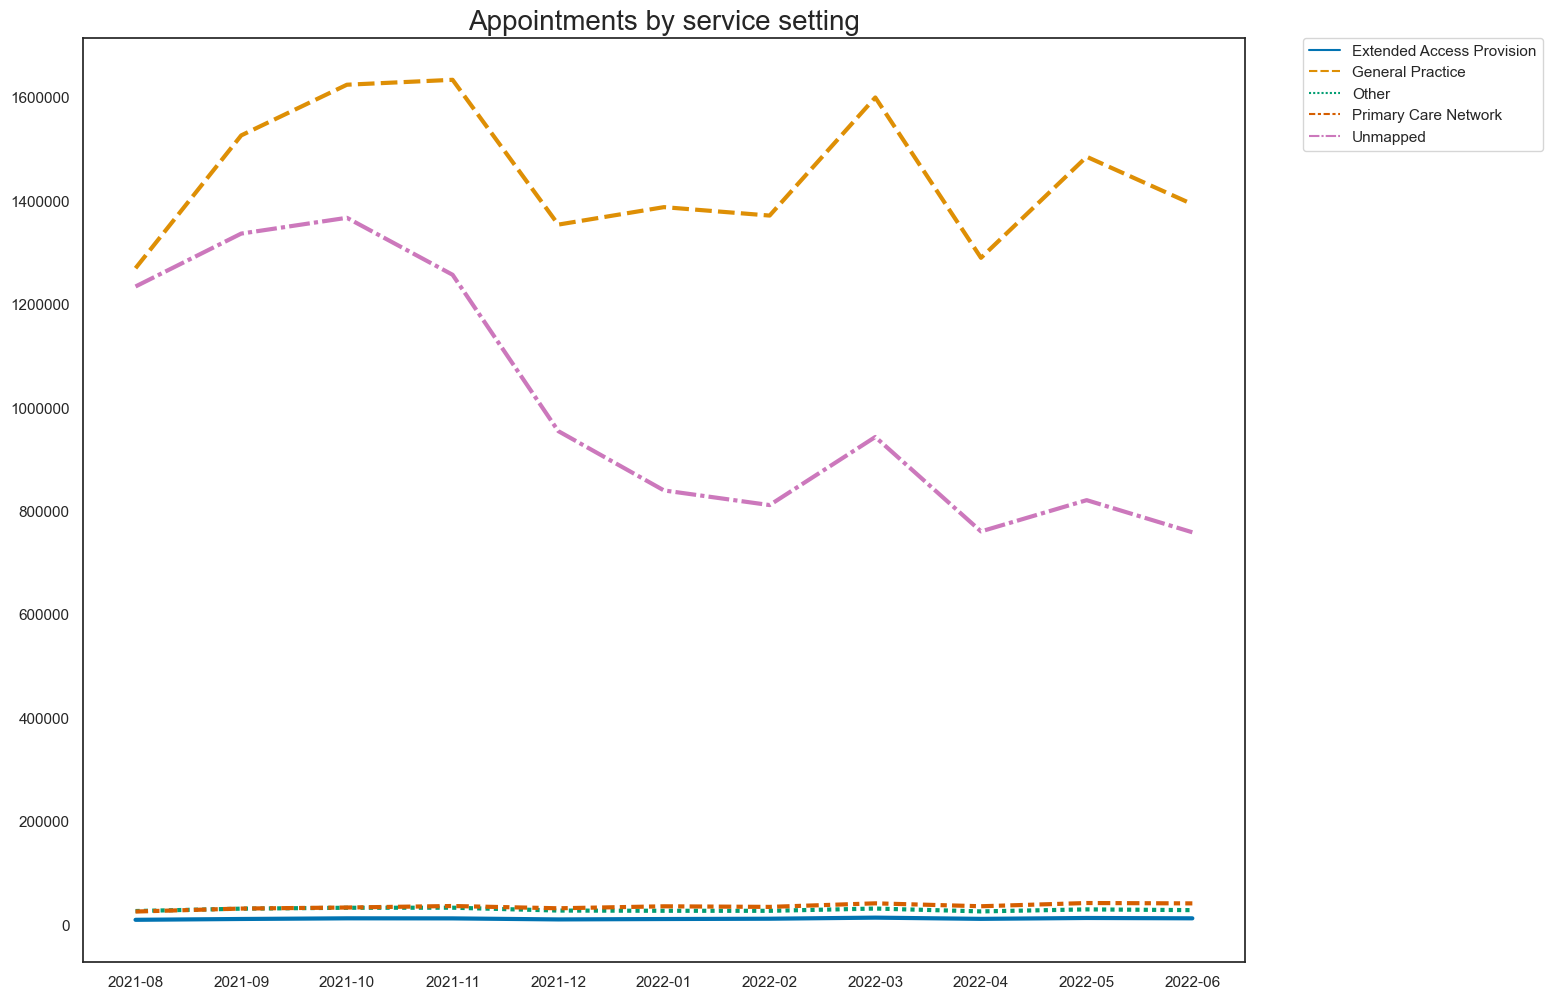

In [125]:
# Lineplot with appointments by service settings over time

create_lineplot('nc_agg_service', nc_agg, 'appointment_month', 'count_of_appointments', 
                'service_setting', 'service_setting', 
                'Appointments by service setting', '', '', 'nc_agg_service.png')

(<Axes: title={'center': 'Appointments by service setting (excluding General Practice)'}>,
 None)

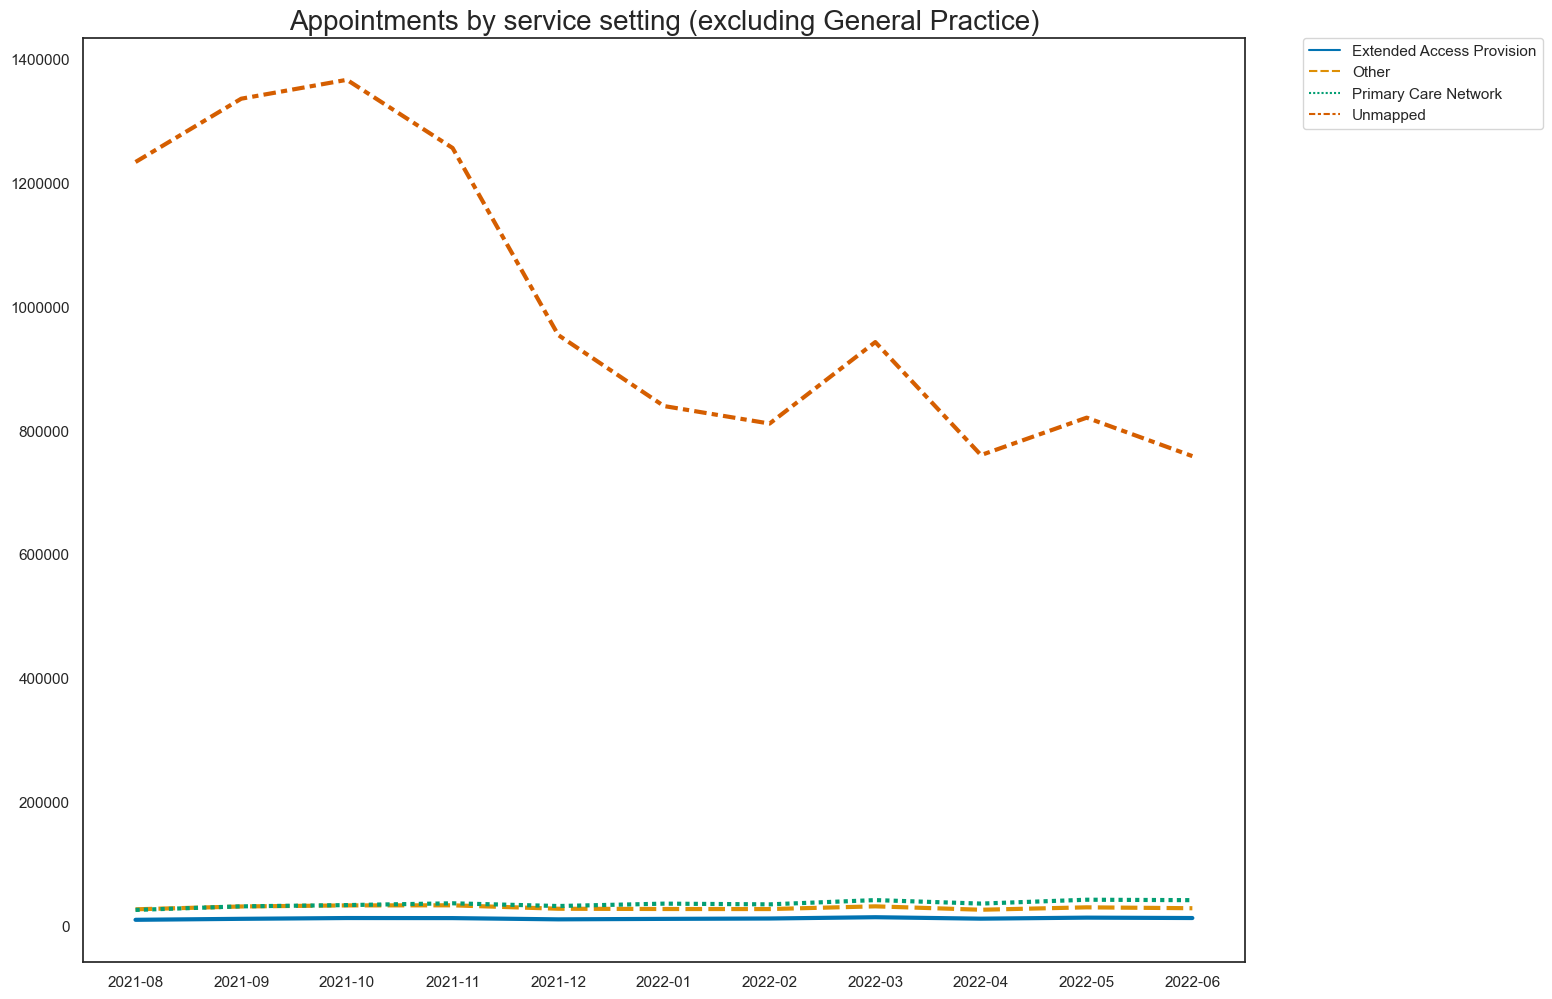

In [185]:
# Lineplot with appointments by service settings over time (excluding General Practice)

create_lineplot('nc_agg_service_exgp', nc_agg[nc_agg['service_setting'] != 'General Practice'], 
                'appointment_month', 'count_of_appointments', 
                'service_setting', 'service_setting', 
                'Appointments by service setting (excluding General Practice)', '', '', 
                'nc_agg_service_exgp.png')

(<Axes: title={'center': 'Appointments by service setting (excluding General Practice and unmapped)'}>,
 None)

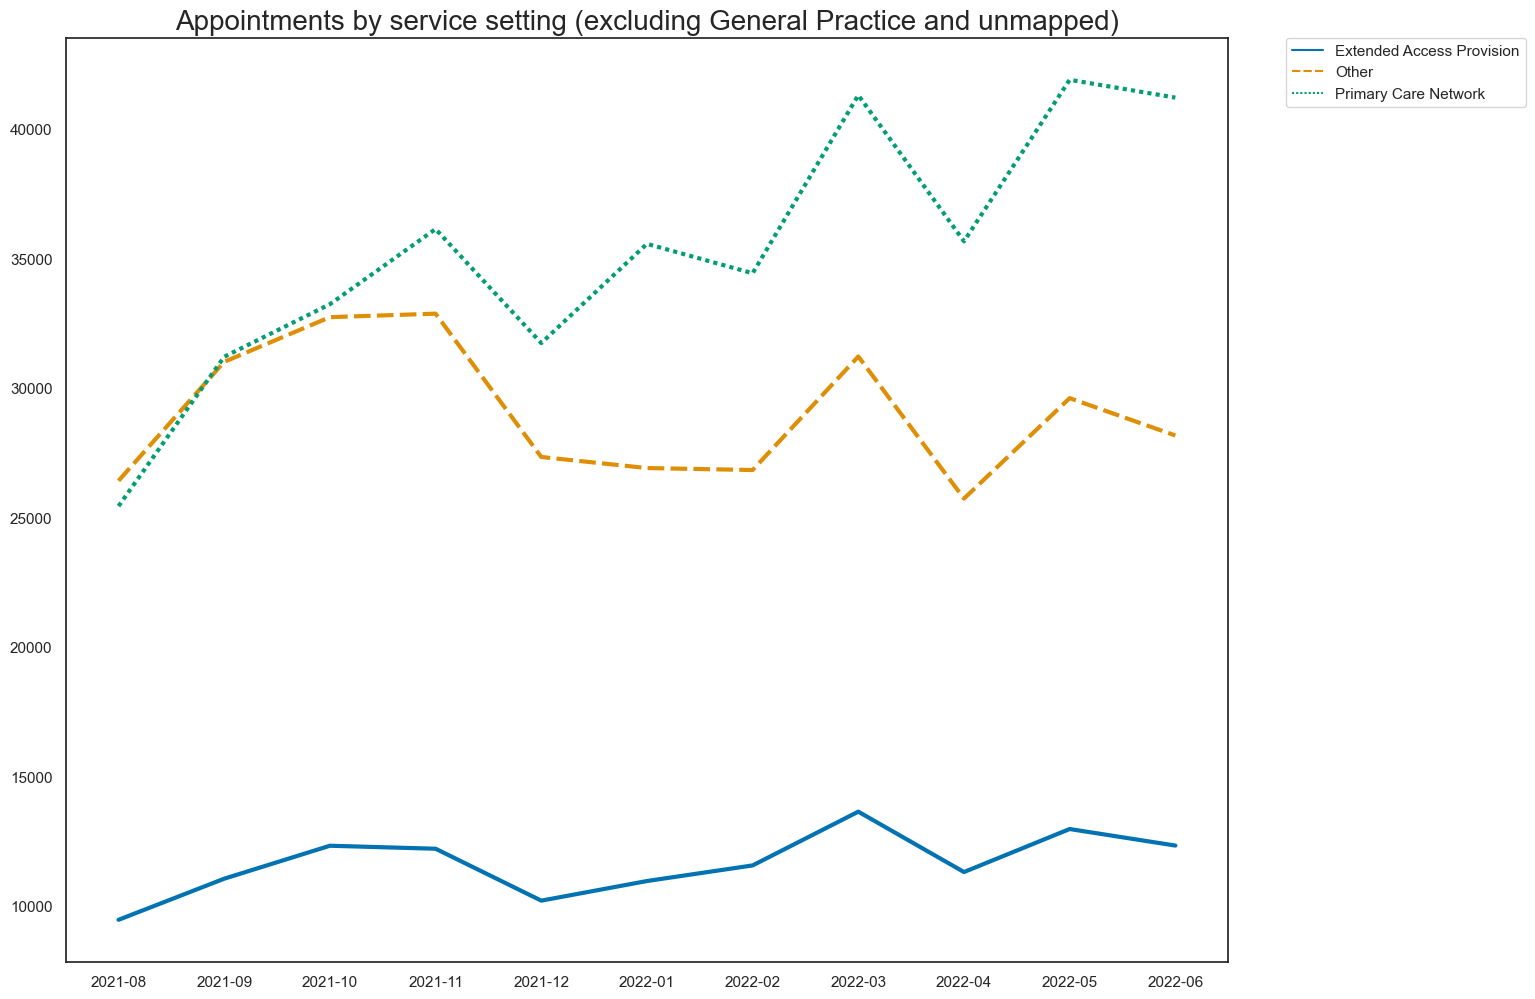

In [186]:
# Lineplot with appointments by service settings over time (excluding General Practice and Unmapped)

create_lineplot('nc_agg_service_exgp_un', 
                nc_agg[~nc_agg['service_setting'].isin(['General Practice', 'Unmapped'])],
                'appointment_month', 
                'count_of_appointments', 
                'service_setting', 'service_setting', 
                'Appointments by service setting (excluding General Practice and unmapped)', 
                '', '', 'nc_agg_service_exgp_un.png')

In [128]:
# Create new dataframe and group by the sum of count of appointments

ad_agg = ad.groupby(['appointment_date', 'actual_duration'])[['count_of_appointments']].agg(sum).reset_index()
ad_agg.head()

,appointment_date,actual_duration,count_of_appointments
0,2021-12-01,1-5 Minutes,217435
1,2021-12-01,11-15 Minutes,167506
2,2021-12-01,16-20 Minutes,104298
3,2021-12-01,21-30 Minutes,96490
4,2021-12-01,31-60 Minutes,57827


In [129]:
# Add column to dataframe for year-mm
ad_agg['appointment_month'] = ad_agg['appointment_date'].dt.strftime("%Y-%m")
ad_agg.head()

,appointment_date,actual_duration,count_of_appointments,appointment_month
0,2021-12-01,1-5 Minutes,217435,2021-12
1,2021-12-01,11-15 Minutes,167506,2021-12
2,2021-12-01,16-20 Minutes,104298,2021-12
3,2021-12-01,21-30 Minutes,96490,2021-12
4,2021-12-01,31-60 Minutes,57827,2021-12


(<Axes: title={'center': 'Appointments by duration over time'}>, None)

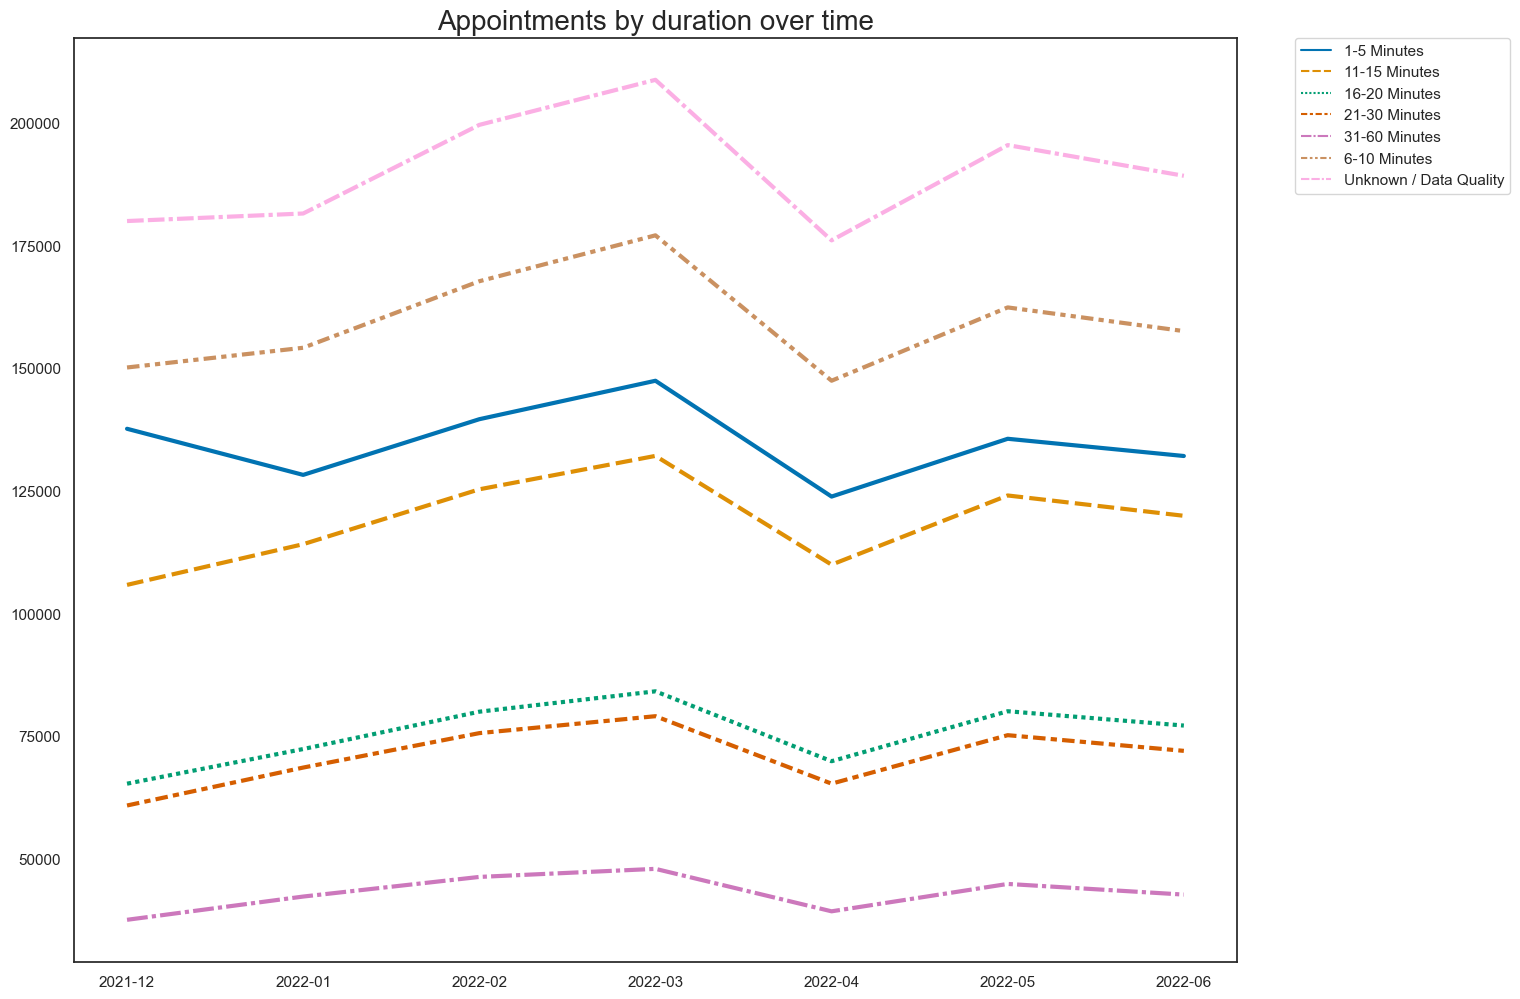

In [130]:
# Lineplot with appointments by duration by month

create_lineplot('appt_duration_time', 
                ad_agg,
                'appointment_month', 
                'count_of_appointments', 
                'actual_duration', 'actual_duration', 
                'Appointments by duration over time', 
                '', '', 'appt_duration_time.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Axes: title={'center': 'Appointments by duration'}, ylabel='Number of appointments'>,
 None)

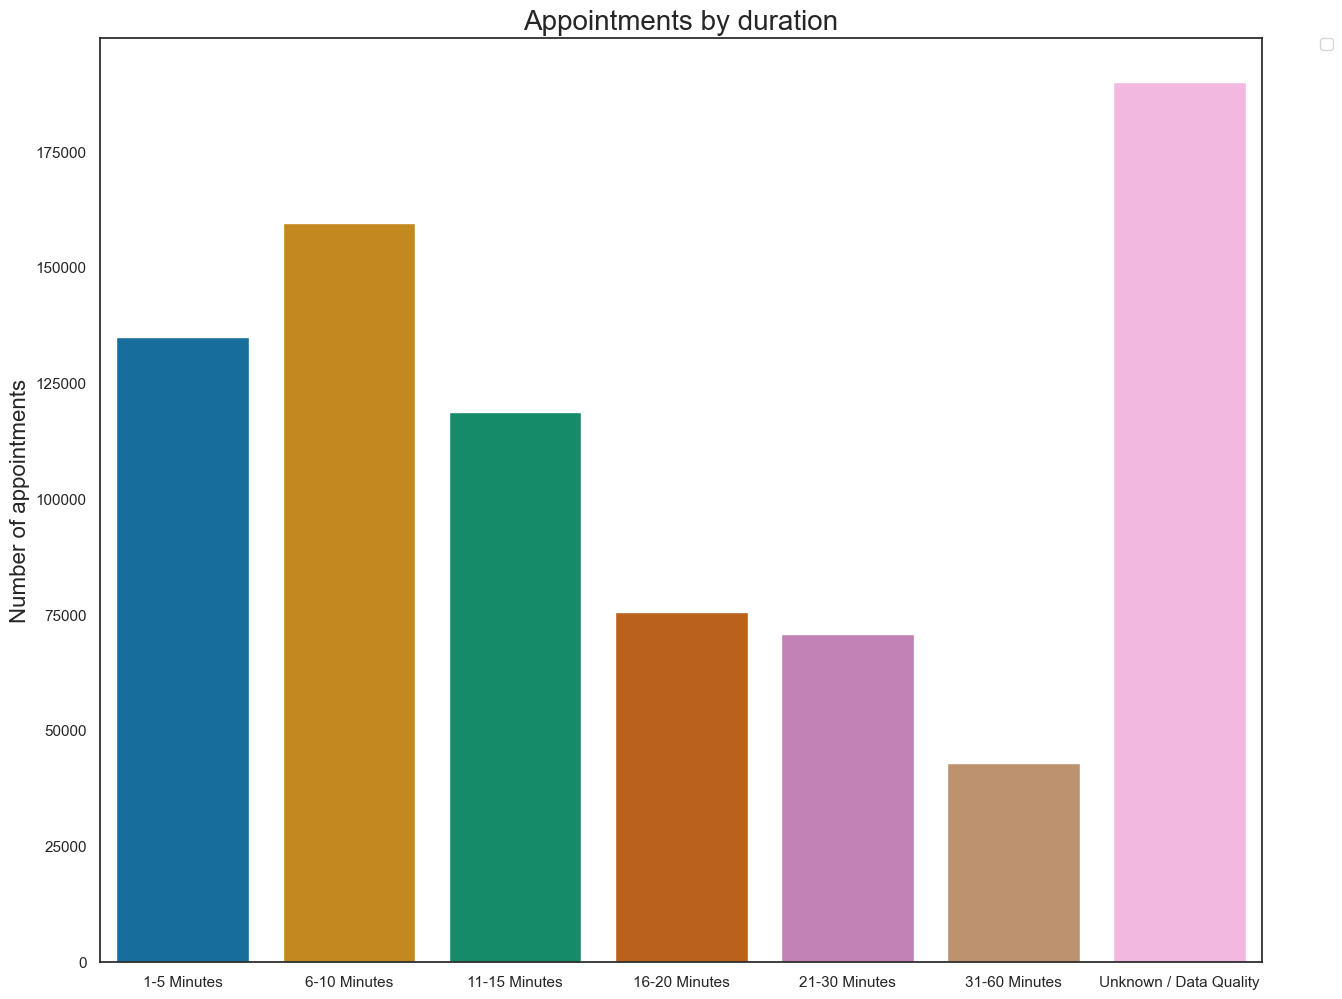

In [131]:
# Barchart for appointments by duration

create_barplot('appt_duration_plot', ad_agg, 'actual_duration', 'count_of_appointments',
              ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes', 'Unknown / Data Quality'],
              'Appointments by duration', '', 'Number of appointments',
              'appt_duration_plot.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Axes: title={'center': 'Average capacity %'}, xlabel=' '>, None)

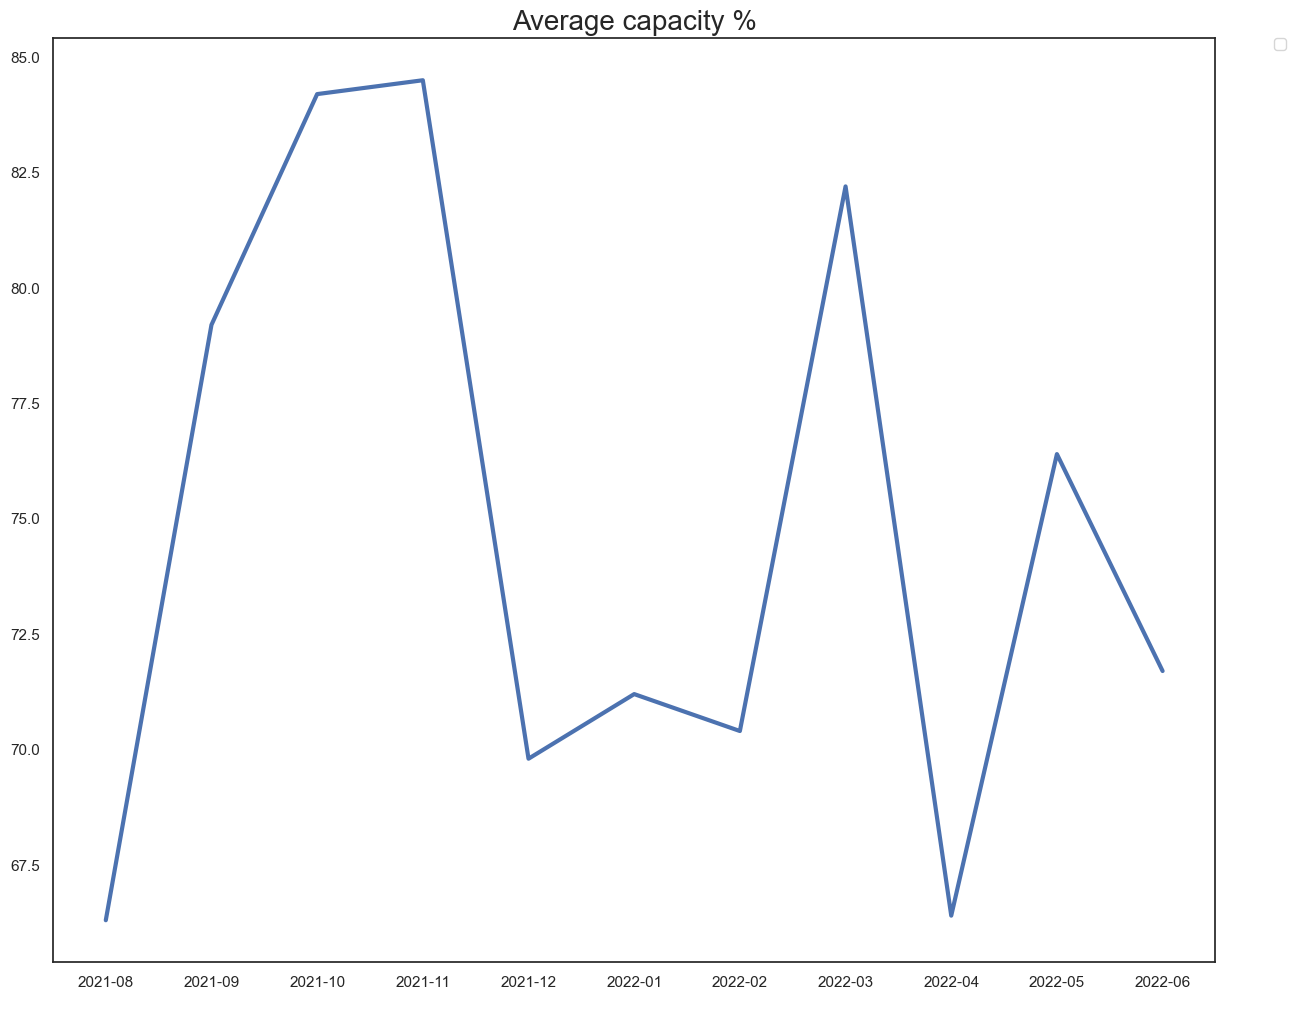

In [132]:
# Lineplot indicating monthly capacity utilisation

create_lineplot('ar_month_plot', ar_month, 'appointment_month', '%_capacity', None, None,
                'Average capacity %', ' ', '', 'ar_capacity_plot.png')

In [183]:
# Function for time series plot with trendline

def generate_time_series_plot_with_trendline(df, time_col, value_col, title="Time Series Plot with Trendline"):
    #make sure time column is in datetime format
    df[time_col] = pd.to_datetime(df[time_col])
    
    #sort DataFrame by the time column
    df.sort_values(by=time_col, inplace=True)
    
    #Calculate trendline
    x = np.arange(len(df))
    y = df[value_col].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    plt.figure(figsize=(12, 6))
    
    # Plot the time series
    sns.lineplot(data=df, x=time_col, y=value_col, label='Actual', linewidth = 2)
    
    # Plot the trendline
    plt.plot(df[time_col], p(x), linestyle='--', color='orange', label='Trend', linewidth = 3)
    
    # Customize the plot
    plt.title('Average capacity with trendline', size = 20)
    plt.xlabel("")
    plt.ylabel('% capacity')
    plt.legend()
    plt.tight_layout()
    plt.show()

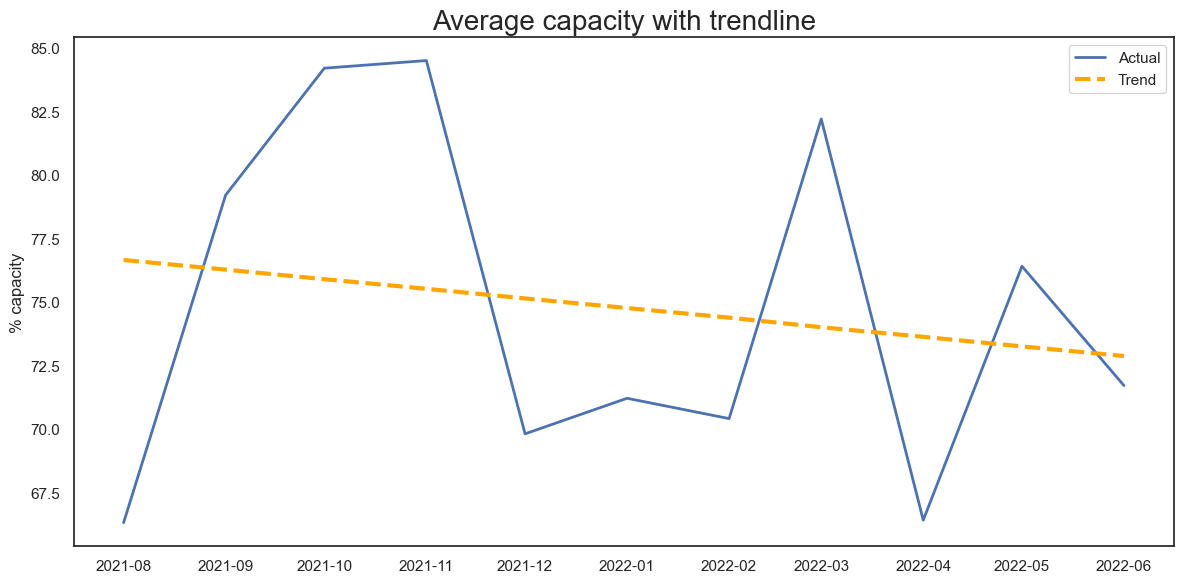

In [184]:
generate_time_series_plot_with_trendline(ar_month, time_col = 'appointment_month', value_col = '%_capacity')

# External data analysis (tweets)

In [135]:
# Set maximum column width of dataframe to 200
pd.options.display.max_colwidth = 200
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [136]:
# Review hashtags (#) in the text, creating new dataframe
tweets_text = pd.DataFrame(tweets, columns = ['tweet_full_text'])
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [137]:
# Create empty list for tags
tags = []

# for loop to return hashtags into tags in lowercase
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())
            
# Create Series from list
tags = pd.Series(tags)
tags.head(10)

0               #healthcare
1            #premisehealth
2                   #hiring
3               #healthcare
4                   🚨#new:🚨
5           look!\n\n#blogs
6    #digitaltransformation
7            #cybersecurity
8               #accounting
9                  #finance
dtype: object

In [138]:
# Count unique hashtags, create new Series and view first 30 rows
tags = tags.value_counts()
tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [139]:
# Convert Series to a dataframe
tags_df = pd.DataFrame(tags).reset_index()
tags_df.head()

,index,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [140]:
# Rename columns
tags_df.rename(columns = {'index':'word'}, inplace = True)
tags_df.head(30)

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


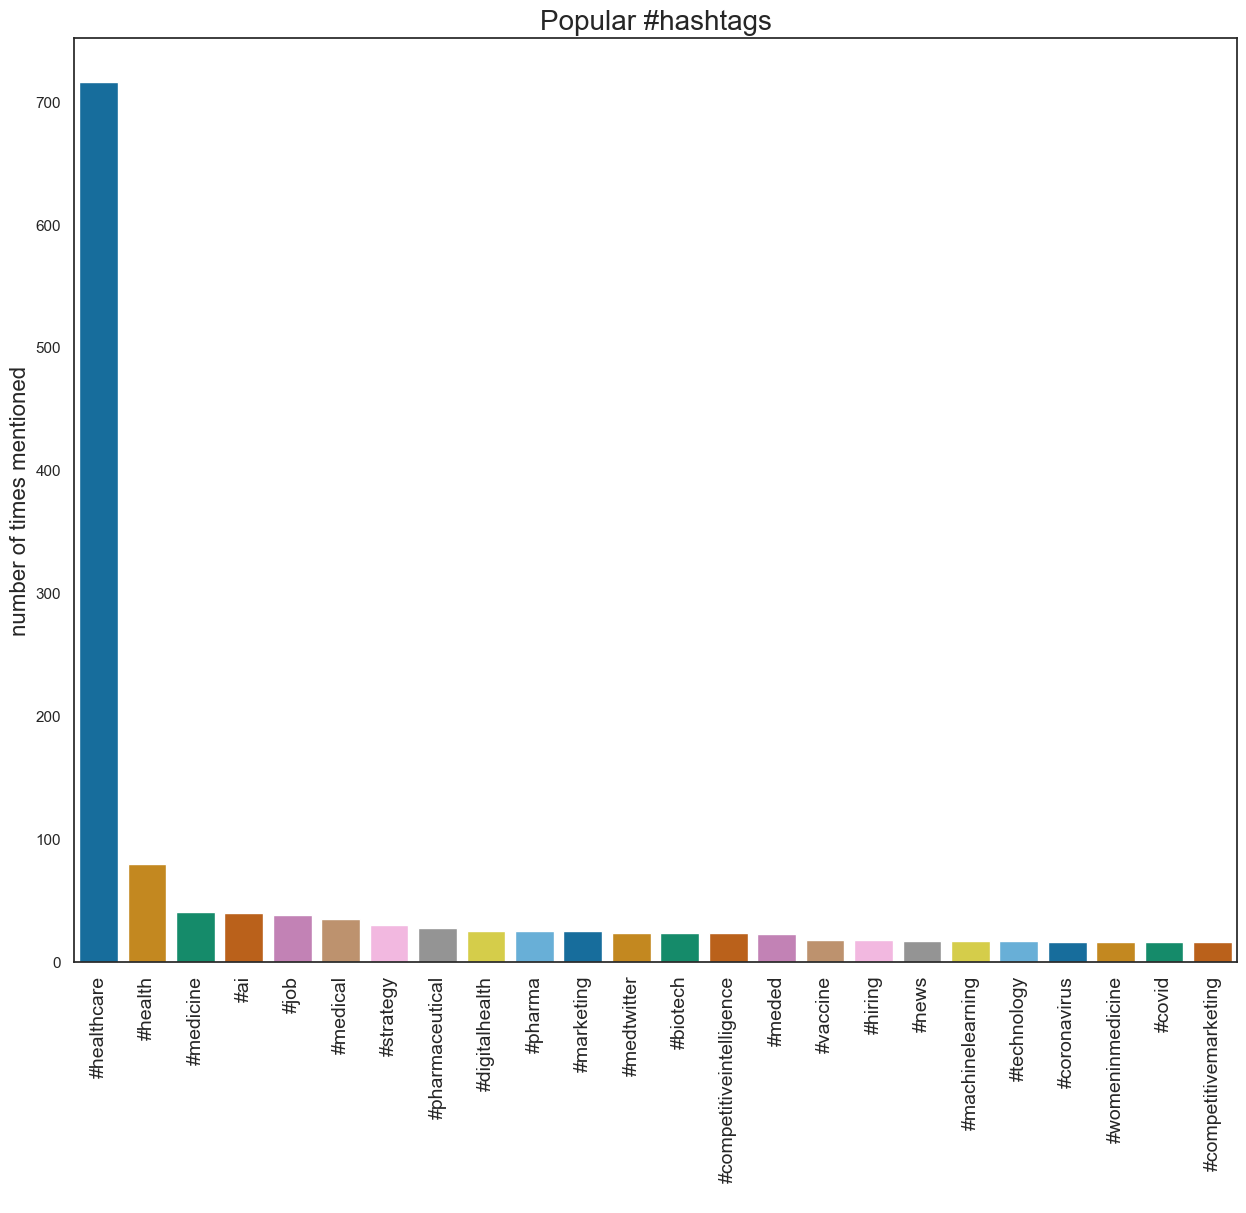

In [141]:
# Create barplot for hashtags with a count > 15

tags_plot = sns.barplot(x = 'word',
            y = 'count',
            data = tags_df[tags_df['count'] > 15],
                        palette = 'colorblind')

plt.xticks(rotation = 90, size = 14)
tags_plot.set_xlabel(" ")
tags_plot.set_ylabel("number of times mentioned", size = 16)
tags_plot.set_title("Popular #hashtags", size = 20)

# View barplot
tags_plot

# Save visualisation
plt.savefig('tags_plot.png', dpi = 300)

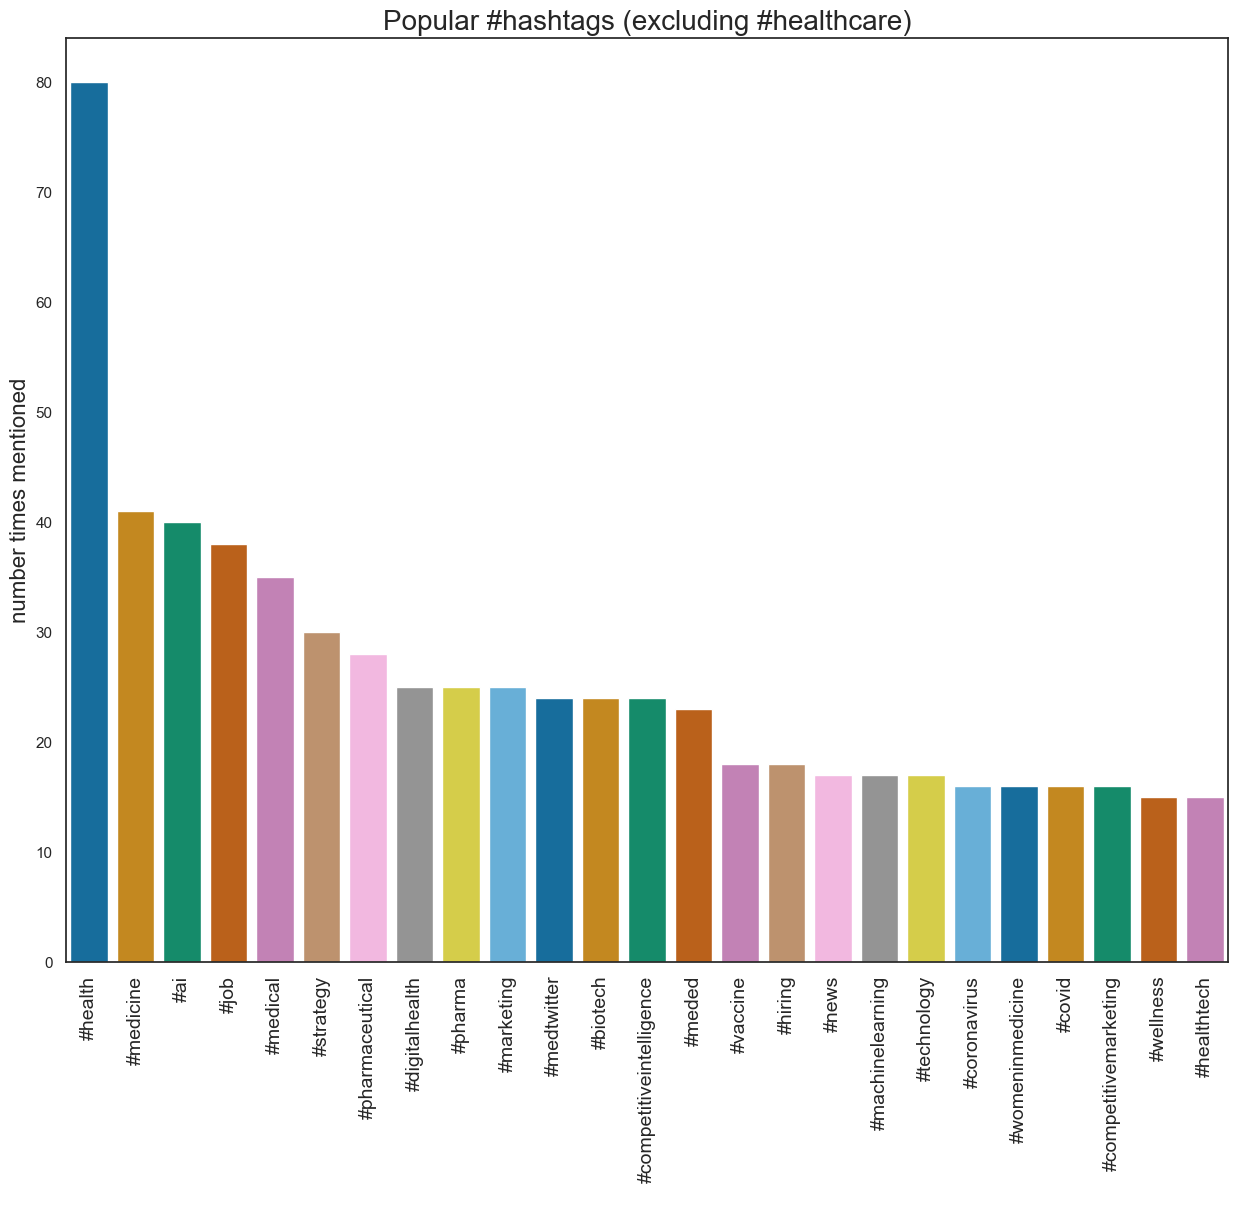

In [142]:
# Create barplot for hashtags with excluding #healthcare (i.e. count less than 100 and greater than 15)

tags_plot1 = sns.barplot(x = 'word',
            y = 'count',
            data = tags_df[tags_df['count'].between(15, 100)],
                        palette = 'colorblind')

plt.xticks(rotation = 90, size = 14)
tags_plot1.set_xlabel(" ")
tags_plot1.set_ylabel("number times mentioned", size = 16)
tags_plot1.set_title("Popular #hashtags (excluding #healthcare)", size = 20)

# View barplot
tags_plot1

# Save visualisation
plt.savefig('tags_plot1.png', dpi = 300)

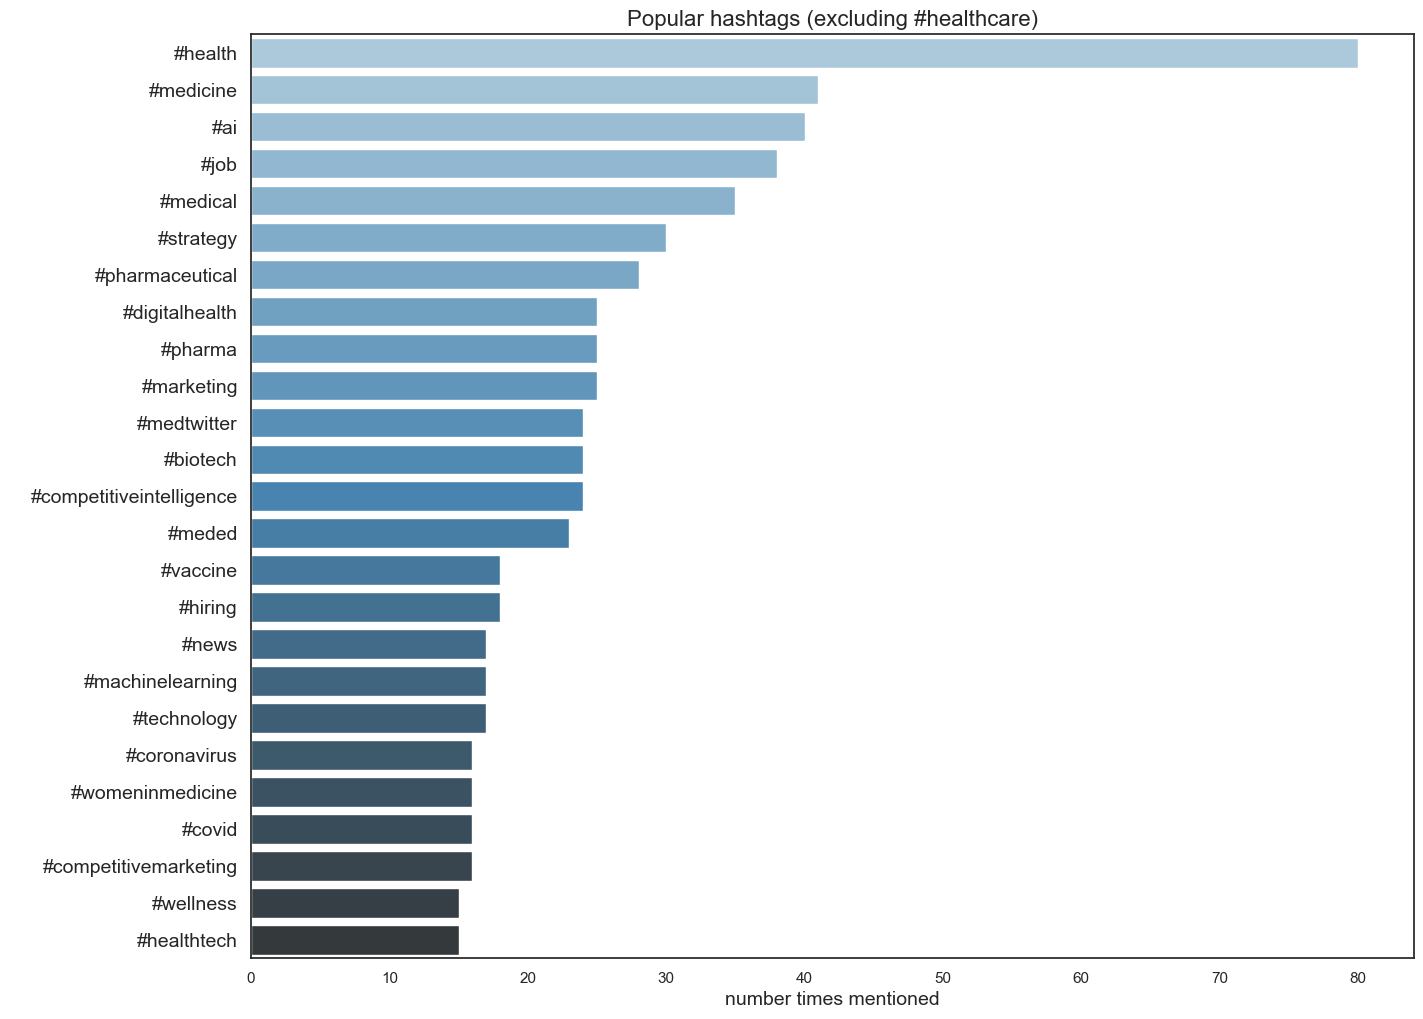

In [143]:
# Recreate horizontally

tags_plot_h = sns.barplot(x = 'count',
                         y = 'word',
                         data = tags_df[tags_df['count'].between(15, 100)],
                         palette = 'Blues_d',
                         orient = 'h')

plt.yticks(size = 14)
tags_plot_h.set_xlabel("number times mentioned", size = 14)
tags_plot_h.set_ylabel(" ")
tags_plot_h.set_title("Popular hashtags (excluding #healthcare)", size = 16)

# View barplot
tags_plot_h

# Save visualisation
plt.savefig('tags_plot_h.png', dpi = 300)